In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
from astropy.cosmology import FlatLambdaCDM
import GCR
import GCRCatalogs as GCRCat
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import itertools
from itertools import permutations 
from itertools import product 

cosmo = FlatLambdaCDM(H0=70, Om0=0.283, Tcmb0=2.725)

plt.rcParams.update({"text.usetex":True, "figure.dpi":150})

TODO: 
- Quick actions:
    - Add random lines for RA, DEC outside the simulation quadrant
    - Download more pieces of Buzzard

---</br>
- Host Probability:
    - Correct Schechter parameter with h?
    - Are the cuts in lower M reasonable? 

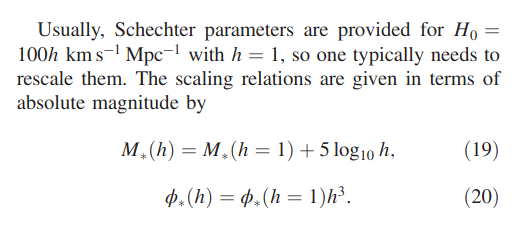

## Fitting Shechter Functions 
(Is it possible to fit )

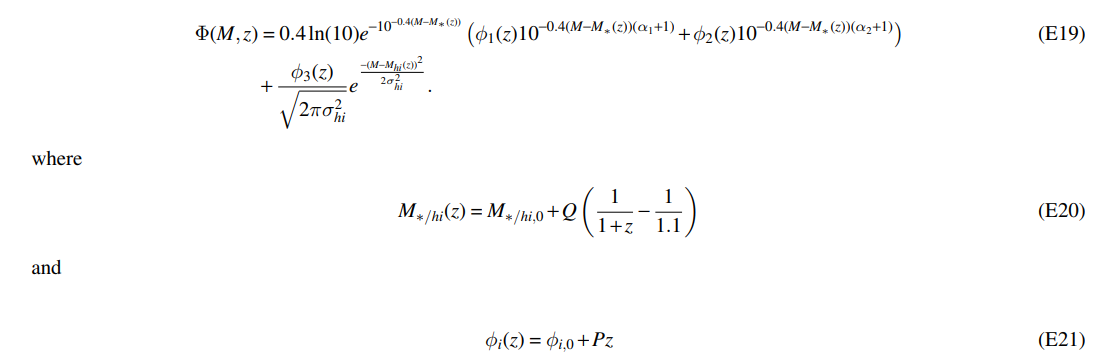

### To do 2:
- Buzzard abs_magnitude cuts
- Write down Buzzard cosmology
- 

##### M*(z=0)
Ref: Cool,+ 12

In [2]:
# From Cool+2012, We got the knee function for the Schechter function 
# The following values are fitting for all galaxy kinds
# (z, M*)
zM = np.array(
    [[0.10,	-20.58],
    [0.20,	-20.81],
    [0.30,	-20.81],
    [0.40,	-20.99],
    [0.50,	-21.29],
    [0.65,	-21.38]])


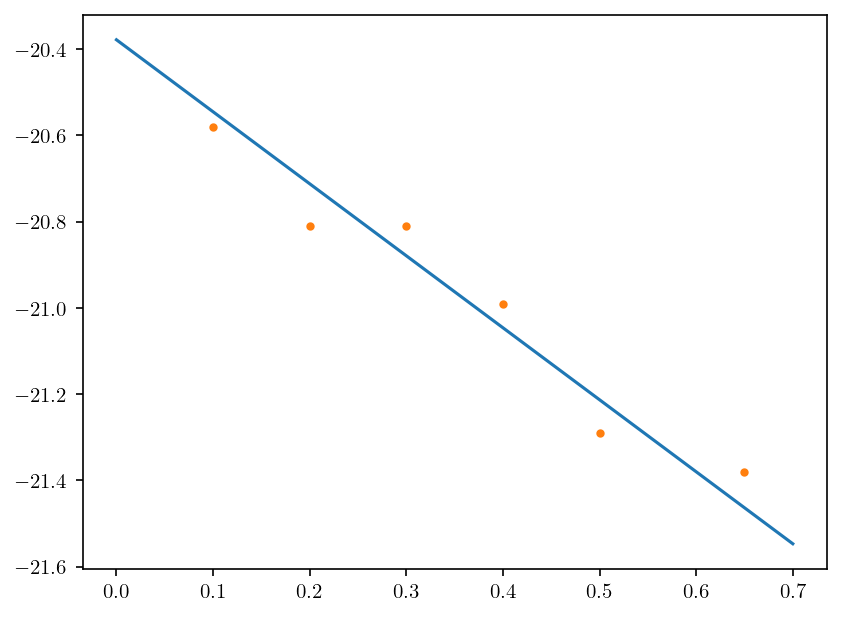

In [3]:
# Found the M_start(z=0) from the fit
# the Q parameter is from Cool+12
_z = np.linspace(0., 0.7)
M0 = -20.378
Q = -1.67
plt.plot(_z, M0+ Q *_z)
plt.plot(zM[:,0], zM[:,1], '.')
plt.show()
plt.close()

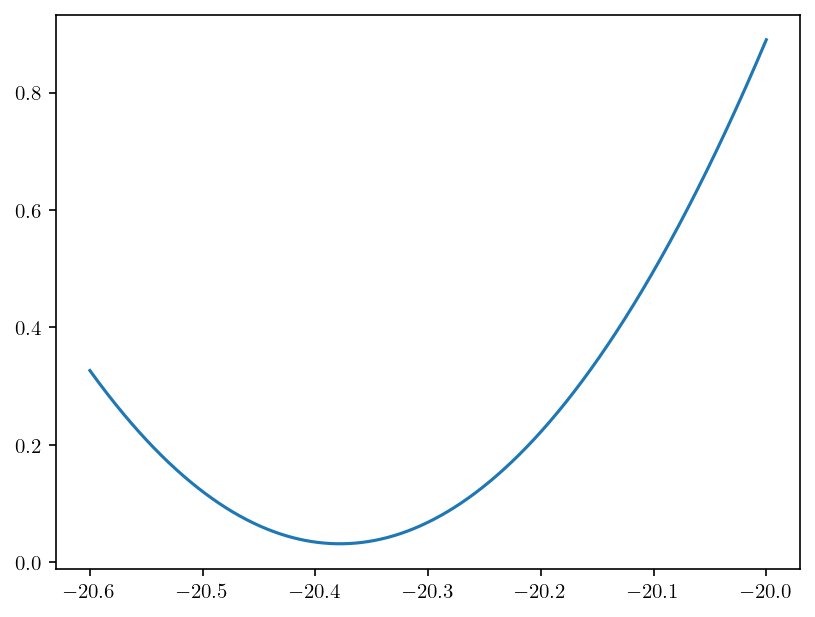

In [4]:
# Fitting M0

ff = lambda M0, zz=zM[:,0] : M0 + Q *zz 
M0_array = np.linspace(-20, -20.6, 5000)
vals = [ np.sum((ff(ii) - zM[:,1])**2) for ii in M0_array]
plt.plot(M0_array, vals)
# Best Fit
M0_array[np.argmin(vals)] # -20.378195639127828
plt.show()
plt.close()

## Host Probability
### Returning to Perna+24 and Mastrogiovanni+23

https://arxiv.org/abs/2405.07904

$f_{rate} = \psi_{CBC}(z) 10 ^{-0.4 \epsilon(M-M_*)}$ </br>

$\psi_{CBC}\propto\frac{1}{1+z}\frac{(1+z)^{1.82}}{1 + (z/2)^{3.82}}$

$\epsilon$: </br>
e = 0 , no Luminosity Dependence</br>
e > 0,  More Luminous galaxies are more likely hosts </br> 

In particular: </br>
e = 1,  is proportional to galaxy luminosity </br> 
In Mastrogiovanni+2023, $\epsilon$ is treated as a free parameter 

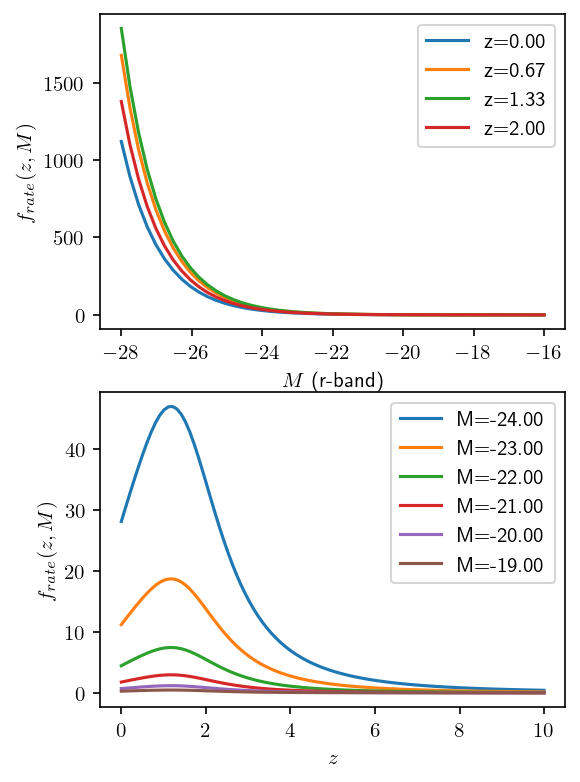

In [5]:
psicbc = lambda z :(1+z)**(1.82) /(1 + (z/2)**3.82) * 1/(1+z)
frate = lambda M,  z, Mstar = -20.378, eps=1 : 10**(-0.4 * eps * (M - Mstar)) * psicbc(z)

Marr=  np.linspace(-28, -16) # -23, -19
zarr = np.linspace(0, 10, 100)

plt.figure(figsize=(4,6))
plt.subplot(211)
for _zz in np.linspace(0, 2, 4):
    plt.plot(Marr, frate(Marr, _zz), label=f"z={_zz:.2f}")
plt.legend(loc='best')
plt.xlabel("$M$ (r-band)")
plt.ylabel("$f_{rate}(z,M)$")

plt.subplot(212)
for _MM in np.linspace(-24, -19, 6):
    plt.plot(zarr, frate(_MM, zarr), label=f"M={_MM:.2f}")
plt.legend(loc='best')
plt.ylabel("$f_{rate}(z,M)$")
plt.xlabel("$z$")
plt.show()
plt.close()

In [6]:
_mgrid = np.linspace(-23, 0, 1000) #  Mmax = 0, fixes the Nevents in 52.243 for z in (0,10)
_zgrid = np.linspace(0, 10, 10000)
fratez = np.array([np.trapz(frate(_mgrid, _zz), _mgrid) for _zz in _zgrid])
nevents = np.trapz(fratez, _zgrid)
nevents

55.2428422410088

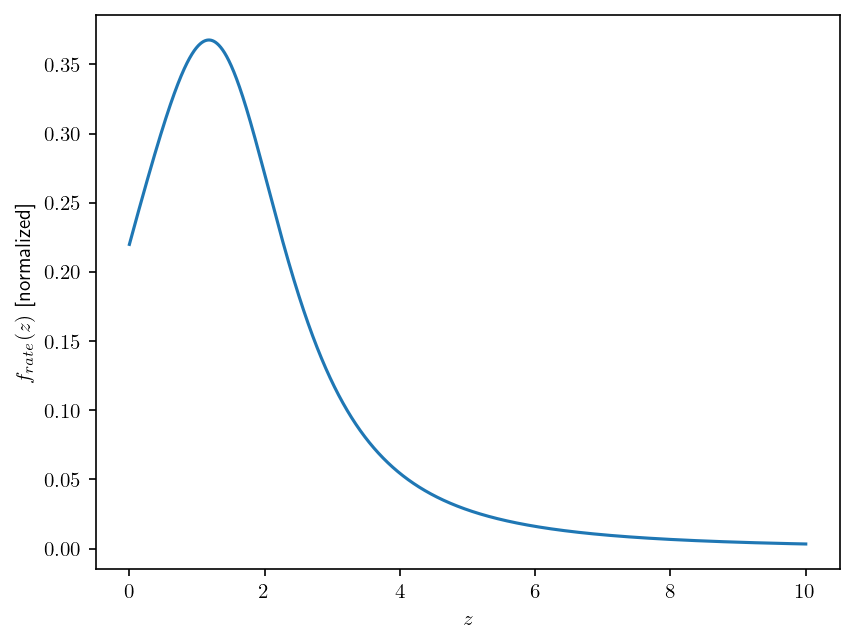

In [7]:
plt.plot(_zgrid, fratez/nevents)
plt.ylabel("$f_{rate}(z)$ [normalized]")
plt.xlabel("$z$")
plt.show()
plt.close()

# ~~Buzzard~~ SkySim5000

In [8]:
import pandas as pd 
# cat = pd.read_csv("buzz_hostprob_rid=0p00-0p04.csv", index_col='id')
# catz = pd.read_csv("bzz_rid=0p00-0p04.csv", index_col='id')
# catz = pd.read_csv("bzzjoin_rid=0p00-0p40.csv") #, index_col='id') 
# 0.00-0.20 n_rows=6,152,385
# 0.00-0.40 (12303588, 20)

cat_name2 = "skysim5000_v1.2_small"
skysimCat = GCRCat.load_catalog(cat_name2)
# catz.shape

In [9]:
# """
# Index(['z_cos', 'z', 'ra', 'dec', 'm200', 'r200', 'tmag_decam_u',
#        'tmag_decam_g', 'tmag_decam_r', 'tmag_decam_i', 'tmag_decam_z',
#        'tmag_decam_y', 'haloid', 'sedid', 'random_id', 'nest4096', 'ring256',
#        'central', 'absmag_r'],
#       dtype='object') """

# catz.columns

In [10]:
skysimCat.get_catalog_info()

{'subclass_name': 'cosmodc2.SkySim5000GalaxyCatalog',
 'catalog_root_dir': '/global/cfs/cdirs/lsst/shared/xgal/skysim/skysim5000_v1.2',
 'catalog_filename_template': 'z_{}_{}.step_all.healpix_{}.hdf5',
 'cosmology': {'H0': 71.0,
  'Om0': 0.2648,
  'Ob0': 0.0448,
  'sigma8': 0.8,
  'n_s': 0.963},
 'lightcone': True,
 'version': '1.2',
 'check_md5': False,
 'check_size': False,
 'check_cosmology': False,
 'ensure_meta_consistent': False,
 'sky_area': 57.071968,
 'creators': ['Andrew Hearin',
  'Danila Korytov',
  'Eve Kovacs',
  'Esteban Rangel',
  'Patricia Larsen',
  'Joe Hollowed',
  'Andrew Benson',
  'Katrin Heitmann'],
 'description': 'This is a small test version of the 5000 sq. deg. extra-galactic catalog for LSST-DESC.\n',
 'include_in_default_catalog_list': True,
 'healpix_pixels': [9559,
  9686,
  9687,
  9814,
  9815,
  9816,
  9942,
  9943,
  10070,
  10071,
  10072,
  10198,
  10199,
  10200,
  10326,
  10327,
  10450]}

In [11]:
allNativeQuants = skysimCat.list_all_native_quantities()

In [12]:
allQuantitiesOfInterest = np.array(["ra","ra_true","dec","dec_true","redshift","redshiftHubble","galaxyID","baseDC2/sfr","hostHaloTag","baseDC2/sod_halo_radius",
                        "LSST_filters/magnitude:LSST_i:rest","LSST_filters/magnitude:LSST_g:rest", # magnitudes in rest and obs frames
                        "LSST_filters/magnitude:LSST_y:rest","LSST_filters/magnitude:LSST_r:observed",
                        "LSST_filters/magnitude:LSST_z:rest","LSST_filters/magnitude:LSST_z:observed",
                        "LSST_filters/magnitude:LSST_u:observed","LSST_filters/magnitude:LSST_i:observed",
                        "LSST_filters/magnitude:LSST_r:rest","LSST_filters/magnitude:LSST_y:observed",
                        "LSST_filters/magnitude:LSST_u:rest","LSST_filters/magnitude:LSST_g:observed",
                        "LSST_filters/totalLuminositiesStellar:LSST_y:rest","LSST_filters/totalLuminositiesStellar:LSST_u:observed", # stellar luminosities in all bands, rest and obs frames
                        "LSST_filters/totalLuminositiesStellar:LSST_g:rest","LSST_filters/totalLuminositiesStellar:LSST_r:observed",
                        "LSST_filters/totalLuminositiesStellar:LSST_y:observed","LSST_filters/totalLuminositiesStellar:LSST_i:rest",
                        "LSST_filters/totalLuminositiesStellar:LSST_i:observed","LSST_filters/totalLuminositiesStellar:LSST_g:observed",
                        "LSST_filters/totalLuminositiesStellar:LSST_z:observed","LSST_filters/totalLuminositiesStellar:LSST_r:rest",
                        "LSST_filters/totalLuminositiesStellar:LSST_u:rest","LSST_filters/totalLuminositiesStellar:LSST_z:rest",
                        "totalMassStellar","hostHaloMass","isCentral"])

In [13]:
for quant in allNativeQuants:
    if quant not in allQuantitiesOfInterest and quant.__contains__("sfr"):
        print(quant)

baseDC2/sfr_percentile
baseDC2/obs_sfr_percentile
baseDC2/obs_sfr


In [14]:
# allNativeQuants 

In [15]:
skysimCat.native_filter_quantities

['healpix_pixel', 'redshift_block_lower']

In [16]:
filterMask =  np.array([not x.__contains__("LSST") for x in allQuantitiesOfInterest])
filteredQuantities = np.append(allQuantitiesOfInterest[filterMask],"LSST_filters/magnitude:LSST_r:rest")

In [17]:
filteredQuantities

array(['ra', 'ra_true', 'dec', 'dec_true', 'redshift', 'redshiftHubble',
       'galaxyID', 'baseDC2/sfr', 'hostHaloTag',
       'baseDC2/sod_halo_radius', 'totalMassStellar', 'hostHaloMass',
       'isCentral', 'LSST_filters/magnitude:LSST_r:rest'], dtype='<U53')

In [18]:
%%time
data = pd.DataFrame(skysimCat.get_quantities(filteredQuantities))

CPU times: user 2.37 s, sys: 4.34 s, total: 6.72 s
Wall time: 5min 22s


In [19]:
data.index

RangeIndex(start=0, stop=93947751, step=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93947751 entries, 0 to 93947750
Data columns (total 14 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   ra                                  float64
 1   hostHaloMass                        float64
 2   LSST_filters/magnitude:LSST_r:rest  float32
 3   galaxyID                            int64  
 4   totalMassStellar                    float32
 5   ra_true                             float64
 6   dec                                 float64
 7   redshiftHubble                      float64
 8   baseDC2/sod_halo_radius             float64
 9   dec_true                            float64
 10  hostHaloTag                         int64  
 11  isCentral                           bool   
 12  baseDC2/sfr                         float32
 13  redshift                            float64
dtypes: bool(1), float32(3), float64(8), int64(2)
memory usage: 8.1 GB


In [21]:
frate = lambda M,  z, Mstar = -20.378, eps=1 : 10**(-0.4 * eps * (M - Mstar)) * psicbc(z)


#### Set P_host

In [22]:
%%time 
phost = frate(data["LSST_filters/magnitude:LSST_r:rest"], data["redshiftHubble"])
phost = phost/ np.sum(phost.values)

CPU times: user 7.54 s, sys: 2.02 s, total: 9.56 s
Wall time: 1.27 s


CPU times: user 178 ms, sys: 39.9 ms, total: 217 ms
Wall time: 218 ms


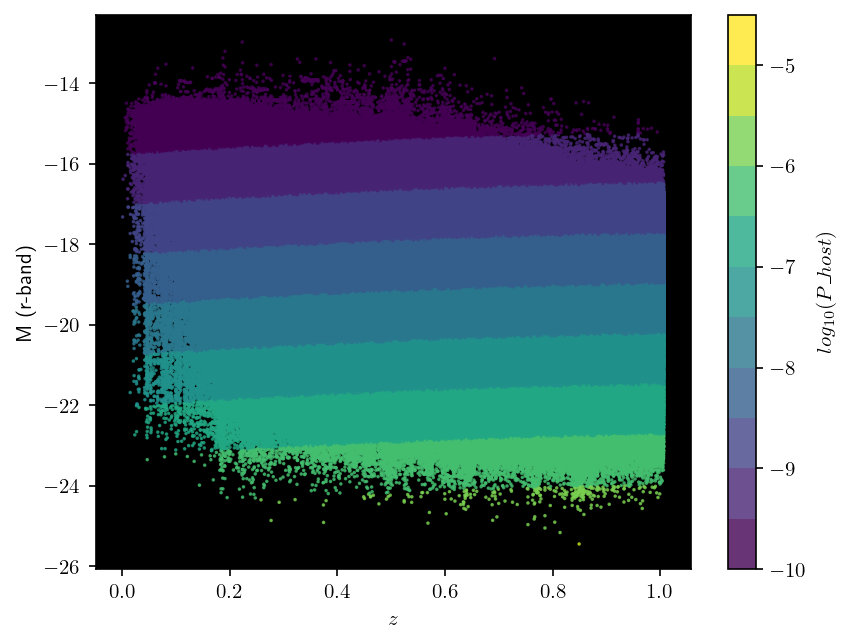

In [23]:
%%time
# plt.figure(dpi=120)
nn = 6000000
plt.scatter(data['redshiftHubble'].values[:nn], 
            data['LSST_filters/magnitude:LSST_r:rest'][:nn],  
            c= np.log10(phost.values[:nn]), cmap=plt.get_cmap('viridis', 11), s=0.5, alpha=0.8, vmax=-4.5, vmin=-10)
plt.ylabel("M (r-band)")
plt.xlabel("$z$")
_cb = plt.colorbar()
_cb.ax.set_ylabel(r"$log_{10}(P\_host)$")
plt.gca().set_facecolor('k')


In [24]:
for col in ["ra","dec"]:
    print(col,np.min(data[col]),np.max(data[col]))

ra 60.46709862957921 70.3338108507918
dec -46.57034567653332 -32.79850657784978


In [25]:
380%360

20

In [26]:
def stretch(ra_in,dec_in,ra_range=(60.46709862957921, 70.3338108507918),dec_range=(-46.57034567653332, -32.79850657784978)):
    delta_ra = ra_in - ra_range[0]
    delta_dec = dec_in - dec_range[0]

    stretched_ra = (1000*360 * (delta_ra / (ra_range[1]-ra_range[0])))%360
    stretched_dec = (1000*180 * (delta_dec / (dec_range[1]-dec_range[0])))%180 - 90

    return stretched_ra,stretched_dec

#### Creating a list of mergers

In [27]:
%%time 
np.random.seed(1503170817)
n_merges = 10000000 # Updated now to 1E7
# Getting indexes based on p_host
events_index = np.random.choice(data.index, 
                                size=n_merges, 
                                p=phost.values)
# radec_quad = np.random.choice([1,2,3,4], size=n_merges)

CPU times: user 13.3 s, sys: 121 ms, total: 13.4 s
Wall time: 13.4 s


In [28]:
events_index # -> array([1, 2, 4, ..., 2, 4, 4]) (for 100,000)

array([53824092, 81850721, 20694499, ..., 16577413, 82229124, 44674785])

In [29]:
data.shape

(93947751, 14)

In [30]:
np.unique(events_index).shape

(7268220,)

In [31]:
events_index.shape
cat_cbc = data.iloc[events_index]

In [32]:
cat_cbc.shape, data.shape, events_index.shape

((10000000, 14), (93947751, 14), (10000000,))

In [33]:
cat_cbc

,ra,hostHaloMass,LSST_filters/magnitude:LSST_r:rest,galaxyID,totalMassStellar,ra_true,dec,redshiftHubble,baseDC2/sod_halo_radius,dec_true,hostHaloTag,isCentral,baseDC2/sfr,redshift
53824092,62.770779,2.550164e+12,-23.153709,10070200392465,1.111759e+11,62.770779,-40.208431,2.787557,0.350757,-40.208431,1028917196889,False,0.0,2.786418
81850721,62.394007,2.485489e+12,-22.049614,9814202166423,6.352384e+09,62.394007,-37.236766,2.044943,0.351237,-37.236766,500460665777,True,0.0,2.044516
20694499,67.617224,6.541729e+11,-22.024382,10072100184865,2.136870e+10,67.617224,-41.572680,1.834209,-1.000000,-41.572680,363309433045,True,0.0,1.834906
46311563,66.938860,4.065490e+10,-18.967964,9816101164643,1.435176e+08,66.938860,-36.626004,1.442409,-1.000000,-36.626004,346198709793,True,0.0,1.437018
52563526,61.436562,1.303860e+13,-21.558790,10070201792402,1.670560e+10,61.436562,-41.042127,2.190634,0.583786,-41.042127,509173840589,False,0.0,2.179471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78052987,62.544190,3.548066e+11,-21.989815,9686201071622,1.892635e+10,62.544190,-35.369961,2.492613,-1.000000,-35.369961,872260833462,True,0.0,2.486440
45640458,67.224608,1.768492e+12,-21.784256,9816101815157,1.982772e+10,67.224608,-37.116259,1.173380,-1.000000,-37.116259,701421307235,False,0.0,1.161973
16577413,61.655855,5.137304e+11,-21.039886,10070100052626,5.367000e+09,61.655855,-40.896745,1.902584,-1.000000,-40.896745,466804426831,True,0.0,1.899893
82229124,60.824988,2.088185e+11,-20.336859,9814201794489,5.684805e+08,60.824988,-37.371238,2.171678,-1.000000,-37.371238,542825983045,True,0.0,2.164332


In [34]:
cat_cbc.galaxyID.value_counts()

galaxyID
9686000297543     39
10326000589250    34
10450000401702    32
9559101104003     31
10071000636578    27
                  ..
9814200438173      1
9686102135843      1
10326000159700     1
9686101732093      1
9815100566449      1
Name: count, Length: 7268220, dtype: int64

In [35]:
# cat_cbc['quad']=radec_quad


In [36]:

# def mock_radec(ra, dec, quad):
#     """
#     Creates mock RA and DEC positions for non-convered regions in Buzzard 2.0.
#     quad (int):
#         1 - keeps original ra, dec (upper left)
#         2 - moves to upper right
#         3 - moves to lower right
#         4 - moves to lower left
#     """
#     if quad==1:
#         return [np.copy(ra), np.copy(dec)]
#     elif quad==2:
#         return [(np.copy(ra) + 180.)%360, np.copy(dec)]
#     elif quad ==3:
#         return [(np.copy(ra) + 180.)%360, -1* np.copy(dec)]
#     elif quad == 4:
#         return [np.copy(ra), -1 * np.copy(dec)]

In [37]:
%%time 

catmock = cat_cbc.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock = catmock.rename(columns={0:'mra', 1: 'mdec'}, )
# catmock['quad'] = cat_cbc['quad']


CPU times: user 2min 44s, sys: 6.16 s, total: 2min 50s
Wall time: 2min 51s


In [38]:
catmock

,mra,mdec
53824092,172.823600,81.175717
81850721,105.784619,41.289369
20694499,241.762863,70.242273
46311563,330.745078,-75.967953
52563526,92.144000,-15.350534
...,...,...
78052987,185.429306,-39.294575
45640458,316.626212,-3.677308
16577413,173.349455,84.804486
82229124,98.081873,83.720684


In [39]:
cat_cbc[["mra","mdec"]] = catmock[['mra', 'mdec']]

/tmp/ipykernel_1535232/1159687147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cbc[["mra","mdec"]] = catmock[['mra', 'mdec']]
/tmp/ipykernel_1535232/1159687147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cbc[["mra","mdec"]] = catmock[['mra', 'mdec']]


In [40]:
cat_cbc

,ra,hostHaloMass,LSST_filters/magnitude:LSST_r:rest,galaxyID,totalMassStellar,ra_true,dec,redshiftHubble,baseDC2/sod_halo_radius,dec_true,hostHaloTag,isCentral,baseDC2/sfr,redshift,mra,mdec
53824092,62.770779,2.550164e+12,-23.153709,10070200392465,1.111759e+11,62.770779,-40.208431,2.787557,0.350757,-40.208431,1028917196889,False,0.0,2.786418,172.823600,81.175717
81850721,62.394007,2.485489e+12,-22.049614,9814202166423,6.352384e+09,62.394007,-37.236766,2.044943,0.351237,-37.236766,500460665777,True,0.0,2.044516,105.784619,41.289369
20694499,67.617224,6.541729e+11,-22.024382,10072100184865,2.136870e+10,67.617224,-41.572680,1.834209,-1.000000,-41.572680,363309433045,True,0.0,1.834906,241.762863,70.242273
46311563,66.938860,4.065490e+10,-18.967964,9816101164643,1.435176e+08,66.938860,-36.626004,1.442409,-1.000000,-36.626004,346198709793,True,0.0,1.437018,330.745078,-75.967953
52563526,61.436562,1.303860e+13,-21.558790,10070201792402,1.670560e+10,61.436562,-41.042127,2.190634,0.583786,-41.042127,509173840589,False,0.0,2.179471,92.144000,-15.350534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78052987,62.544190,3.548066e+11,-21.989815,9686201071622,1.892635e+10,62.544190,-35.369961,2.492613,-1.000000,-35.369961,872260833462,True,0.0,2.486440,185.429306,-39.294575
45640458,67.224608,1.768492e+12,-21.784256,9816101815157,1.982772e+10,67.224608,-37.116259,1.173380,-1.000000,-37.116259,701421307235,False,0.0,1.161973,316.626212,-3.677308
16577413,61.655855,5.137304e+11,-21.039886,10070100052626,5.367000e+09,61.655855,-40.896745,1.902584,-1.000000,-40.896745,466804426831,True,0.0,1.899893,173.349455,84.804486
82229124,60.824988,2.088185e+11,-20.336859,9814201794489,5.684805e+08,60.824988,-37.371238,2.171678,-1.000000,-37.371238,542825983045,True,0.0,2.164332,98.081873,83.720684


In [ ]:
%%time 
ofn = "../data/mergers-w=Lum,n=1e7,FromSkySim50.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

In [299]:
!ls -lh {ofn}

-rw-rw---- 1 seanmacb seanmacb 130M Feb 24 09:06 'mergers-w=Lum,n=1e6,from_rid=0.0-0.40.csv'


In [300]:
cmap='viridis'

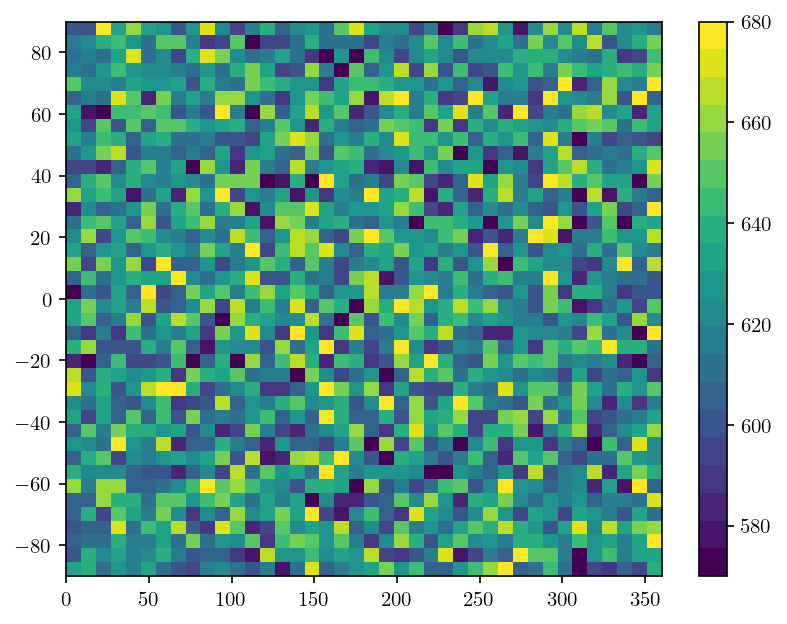

In [301]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc['mra'], y=cat_cbc['mdec'], bins=40, cmap=plt.get_cmap(cmap, 20), vmin=570,vmax=680); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar()


In [357]:
skysimCat.cosmology

FlatLambdaCDM(name=None, H0=<Quantity 71. km / (Mpc s)>, Om0=0.2648, Tcmb0=<Quantity 0. K>, Neff=3.04, m_nu=None, Ob0=0.0448)

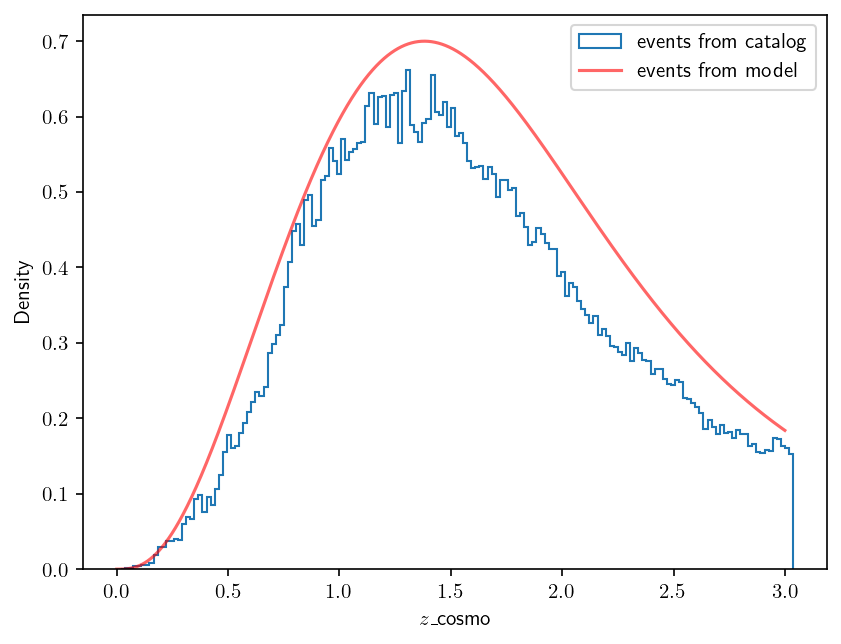

In [359]:
cosmo = skysimCat.cosmology
cosvol =  cosmo.comoving_volume(_zgrid[_zgrid<=3]) * fratez[_zgrid<=3] /(1+_zgrid[_zgrid<=3])**3
cosvol = 0.7*cosvol/cosvol.max() # Why is the 0.7 factor introduced here? little h? or just a scale?
plt.hist(data.iloc[events_index]['redshiftHubble'], histtype='step', bins='fd', density=True, label='events from catalog');
# plt.plot(_zgrid[_zgrid<=2.4], fratez[_zgrid<=2.4]/55.24284224)
# plt.hist(cat_cbc['z_cos'], bins='fd', density=True, label='final cut', alpha=0.3);

plt.plot(_zgrid[_zgrid<=3], cosvol, label="events from model", c='r', alpha=0.6)
plt.xlabel(r"$z$_cosmo")
plt.ylabel("Density")
plt.legend(loc="best")


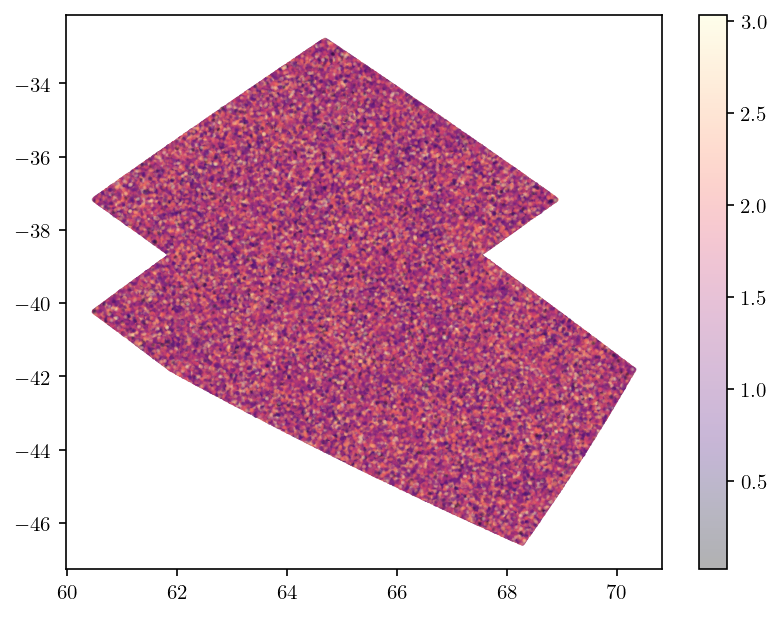

In [303]:
plt.scatter(x='ra', y='dec', c='redshiftHubble', data=data.loc[events_index], cmap='magma', s=1, alpha=0.3)
plt.colorbar()

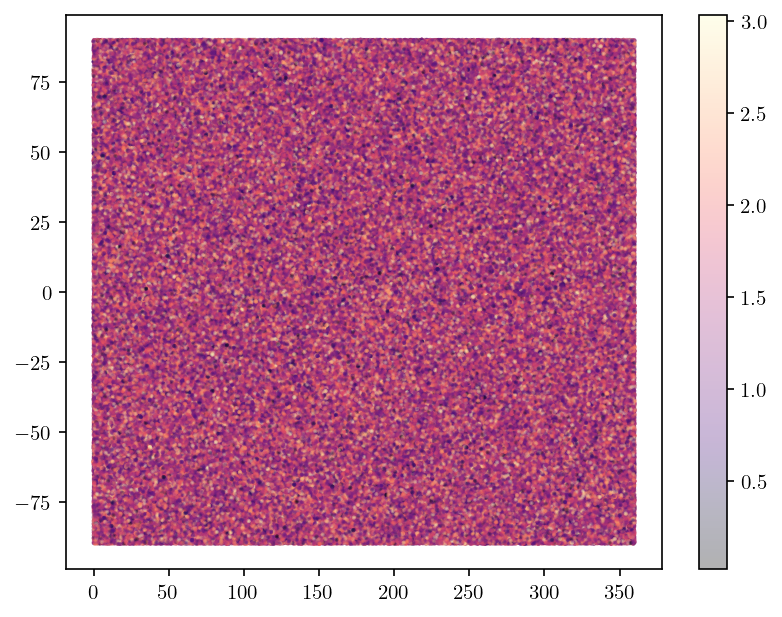

In [360]:
plt.scatter(x='mra', y='mdec', c='redshiftHubble', data=cat_cbc.loc[events_index], cmap='magma', s=1, alpha=0.3)
plt.colorbar()

In [133]:
# ra1, dec1 = catmock['mra'][cat_cbc['quad']==1], catmock['mdec'][cat_cbc['quad']==1]
# ra2, dec2 = catmock['mra'][cat_cbc['quad']==2], catmock['mdec'][cat_cbc['quad']==2]
# ra3, dec3 = catmock['mra'][cat_cbc['quad']==3], catmock['mdec'][cat_cbc['quad']==3]
# ra4, dec4 = catmock['mra'][cat_cbc['quad']==4], catmock['mdec'][cat_cbc['quad']==4]


In [132]:
# cmap='magma'
# plt.subplot(221)
# plt.title("quad: 1")
# plt.hist2d(x=ra1, y=dec1,bins=30, cmap=plt.get_cmap(cmap, 20), vmin=-1); 
# plt.xlim(0, 360)
# plt.ylim(-90, 90)
# plt.gca().set_facecolor('k')
# plt.colorbar()
# plt.ylabel("DEC")

# plt.subplot(222)
# plt.title("quad: 2")
# plt.hist2d(x=ra2, y=dec2,bins=30, cmap=plt.get_cmap(cmap, 20), vmin=-1); 
# plt.xlim(0, 360)
# plt.ylim(-90, 90)
# plt.colorbar()
# plt.gca().set_facecolor('k')

# plt.subplot(223)
# plt.annotate("quad: 3", xy=(0.5, 0.9), xycoords="axes fraction", c='w', fontsize=14 )
# plt.hist2d(x=ra3, y=dec3, bins=30, cmap=plt.get_cmap(cmap, 20), vmin=-1); 
# plt.xlim(0, 360)
# plt.ylim(-90, 90)
# plt.colorbar()
# plt.xlabel("RA")
# plt.ylabel("DEC")
# plt.gca().set_facecolor('k')

# plt.subplot(224)
# plt.annotate("quad: 4", xy=(0.5, 0.9), xycoords="axes fraction", c='w', fontsize=14 )
# plt.hist2d(x=ra4, y=dec4, bins=30, cmap=plt.get_cmap(cmap, 20), vmin=-1); 
# plt.xlim(0, 360)
# plt.ylim(-90, 90)
# plt.colorbar()
# plt.xlabel("RA")
# plt.gca().set_facecolor('k')


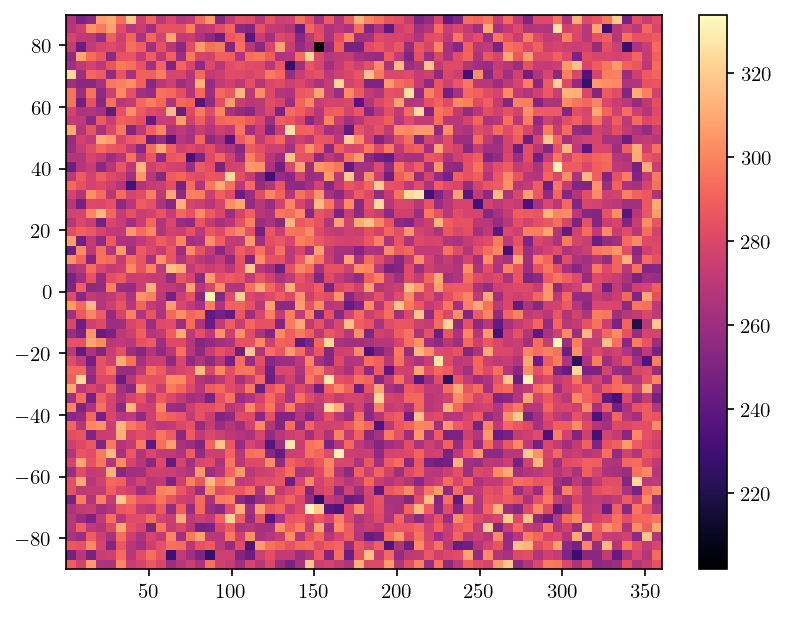

In [195]:
plt.hist2d(catmock['mra'], catmock['mdec'], bins=60, cmap='magma'); plt.colorbar()

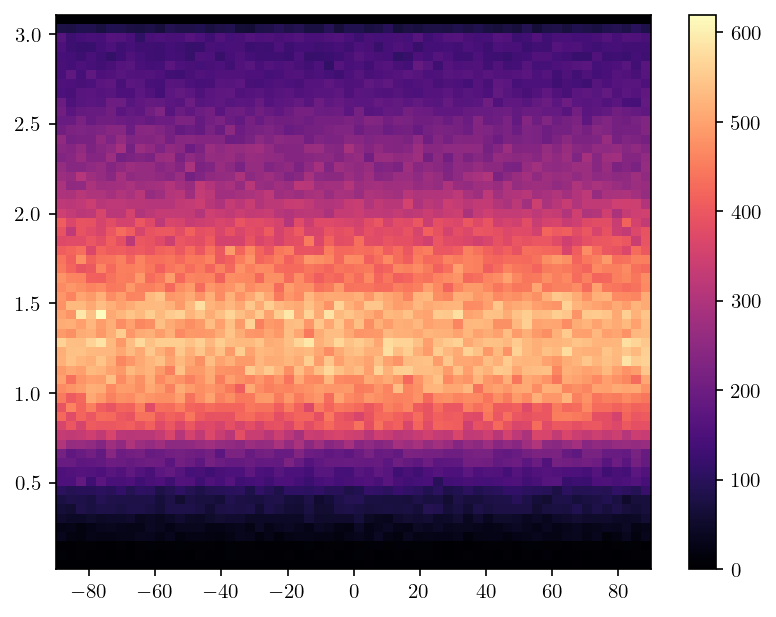

In [311]:
plt.hist2d(cat_cbc['mdec'], cat_cbc['redshift'], bins=60, cmap='magma'); plt.colorbar()

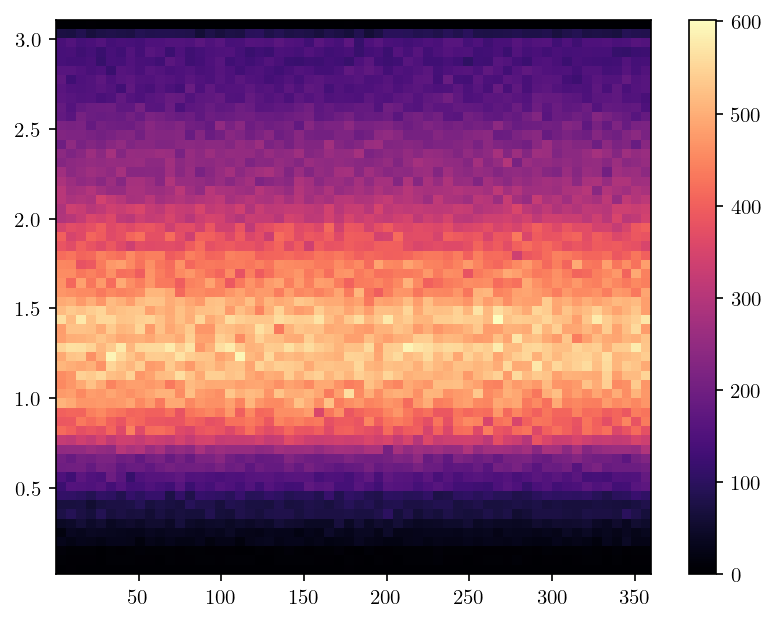

In [310]:
plt.hist2d(cat_cbc['mra'], cat_cbc['redshift'], bins=60, cmap='magma'); plt.colorbar()

In [221]:
import healpy as hp
NSIDE=32

def radecToIndex(RA, DEC, NSIDE=NSIDE):
    return hp.pixelfunc.ang2pix(NSIDE,np.radians(-DEC+90.),np.radians(360.-RA))

,LSST_filters/magnitude:LSST_r:rest,totalMassStellar,redshiftHubble,galaxyID,dec_true,hostHaloMass,ra,dec,hostHaloTag,ra_true,baseDC2/sod_halo_radius,baseDC2/sfr,redshift,isCentral,mra,mdec
53824092,-23.153709,1.111759e+11,2.787557,10070200392465,-40.208431,2.550164e+12,62.770779,-40.208431,1028917196889,62.770779,0.350757,0.0,2.786418,False,172.823600,81.175717
81850721,-22.049614,6.352384e+09,2.044943,9814202166423,-37.236766,2.485489e+12,62.394007,-37.236766,500460665777,62.394007,0.351237,0.0,2.044516,True,105.784619,41.289369
20694499,-22.024382,2.136870e+10,1.834209,10072100184865,-41.572680,6.541729e+11,67.617224,-41.572680,363309433045,67.617224,-1.000000,0.0,1.834906,True,241.762863,70.242273
46311563,-18.967964,1.435176e+08,1.442409,9816101164643,-36.626004,4.065490e+10,66.938860,-36.626004,346198709793,66.938860,-1.000000,0.0,1.437018,True,330.745078,-75.967953
52563526,-21.558790,1.670560e+10,2.190634,10070201792402,-41.042127,1.303860e+13,61.436562,-41.042127,509173840589,61.436562,0.583786,0.0,2.179471,False,92.144000,-15.350534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33117589,-18.554403,8.503546e+07,1.435337,10450101208010,-46.354699,1.219648e+11,68.072960,-46.354699,281200431626,68.072960,-1.000000,0.0,1.435910,True,309.861134,28.528358
36785544,-18.258535,5.461931e+07,1.115703,9686101859930,-35.363638,5.359056e+10,62.722171,-35.363638,664411304896,62.722171,-1.000000,0.0,1.112892,True,199.277924,43.354578
22461082,-21.202791,6.724436e+09,1.624585,10198100729664,-41.072617,2.089456e+13,63.947168,-41.072617,392767720927,63.947168,0.654688,0.0,1.620809,False,254.927392,-53.865419
16727282,-21.790970,2.338315e+10,1.025592,10071102123701,-40.703905,4.065493e+11,64.389561,-40.703905,588802974951,64.389561,-1.000000,0.0,1.032493,True,196.208747,85.264949


In [330]:
%%time
hpindex = cat_cbc.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

CPU times: user 50.8 s, sys: 742 ms, total: 51.5 s
Wall time: 55.6 s


In [331]:
# plt.subplot(211)
# for i in [1,2,3,4]:
#     plt.hist(catmock['mra'][catmock['quad']==i], histtype='step', label=i)
# plt.legend(loc='best')

# plt.subplot(212)
# for i in [1,2,3,4]:
#     plt.hist(catmock['mdec'][catmock['quad']==i], histtype='step', label=i)
# plt.legend(loc='best')


In [332]:
pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

# q1counts = hpindex[catmock['quad']==1].value_counts()
# q1map = np.zeros(hp.nside2npix(NSIDE))
# q1map[q1counts.index] = q1counts

# q2counts = hpindex[catmock['quad']==2].value_counts()
# q2map = np.zeros(hp.nside2npix(NSIDE))
# q2map[q2counts.index] = q2counts

# q3counts = hpindex[catmock['quad']==3].value_counts()
# q3map = np.zeros(hp.nside2npix(NSIDE))
# q3map[q3counts.index] = q3counts

# q4counts = hpindex[catmock['quad']==4].value_counts()
# q4map = np.zeros(hp.nside2npix(NSIDE))
# q4map[q4counts.index] = q4counts


In [333]:
# plt.figure(figsize=(8,5))

# for i,mm in enumerate([q1map, q2map, q3map, q4map]):
#     plt.subplot(221+i)
#     hp.mollview(mm, max=23, cmap='magma', 
#                 title=([f"quad: {j+1}" for j in range(4)])[i], 
#                 hold=True, cbar=None)

In [334]:
# catz

### How even are our distribution

In [318]:
# for i in range(1,5):
#     plt.hist(catz.loc[cat_cbc.index]['absmag_r'][cat_cbc['quad']==i], bins='fd', histtype='step', label=f"quad: {i}", density=False)
# # plt.hist(catz.loc[cat_cbc.index]['absmag_r'], histtype='step', label=f"All", density=True)
# plt.legend(loc='best')

# plt.xlabel("M (r-band)")

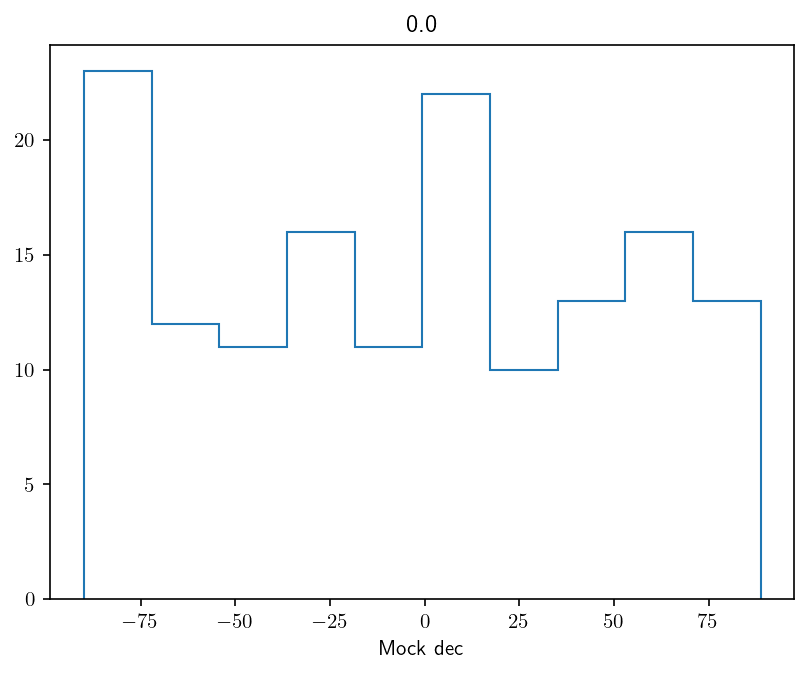

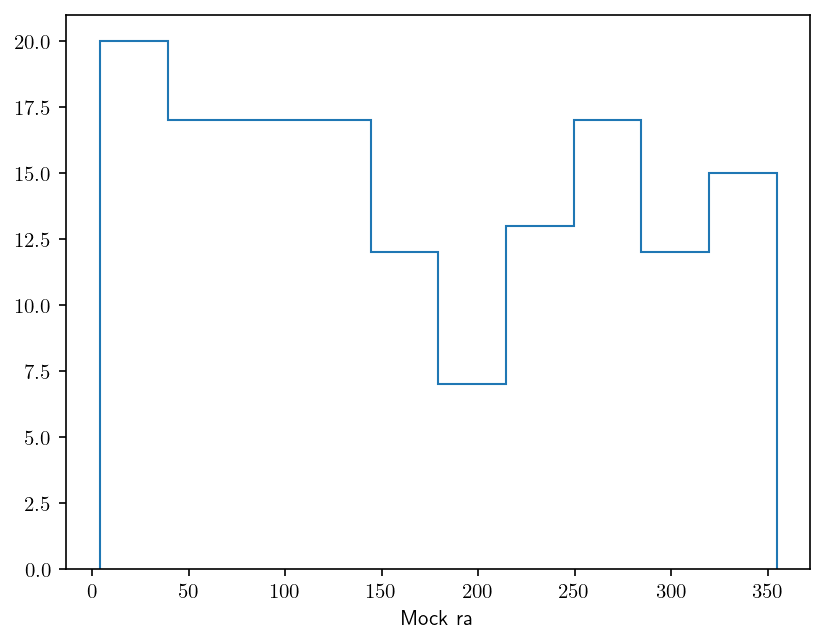

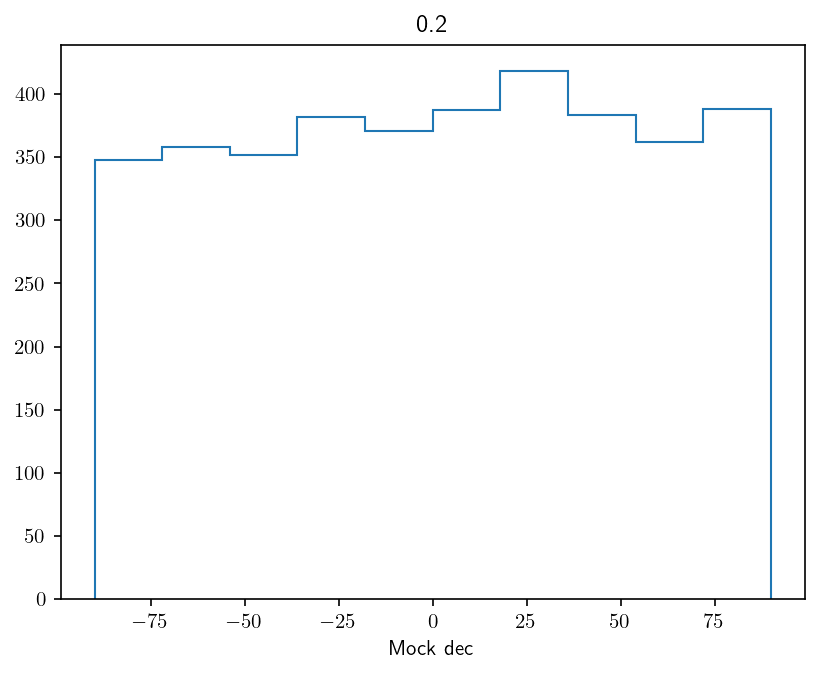

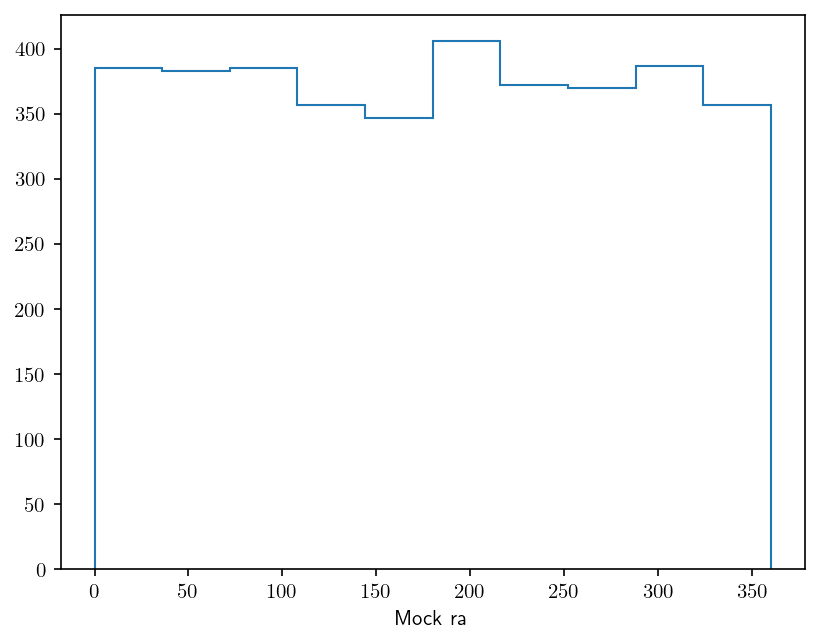

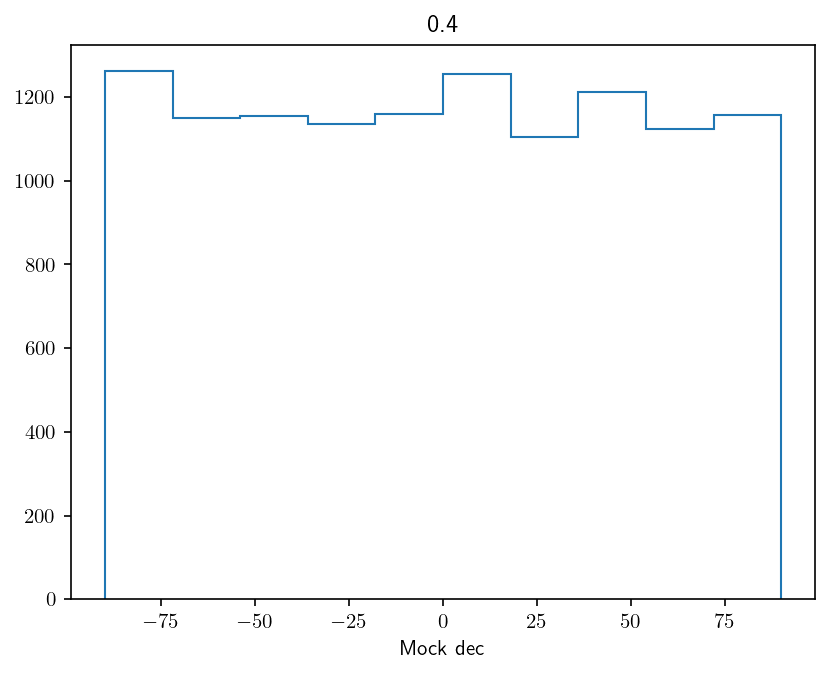

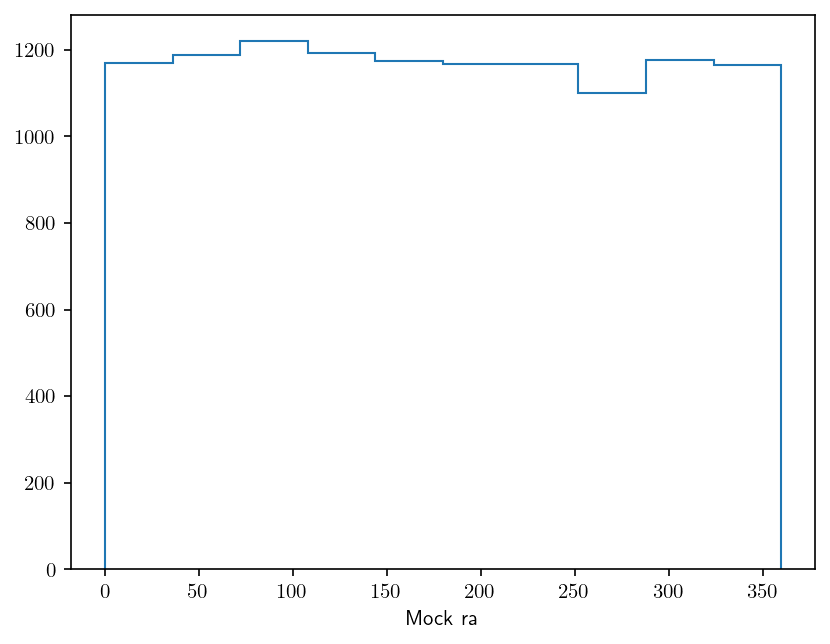

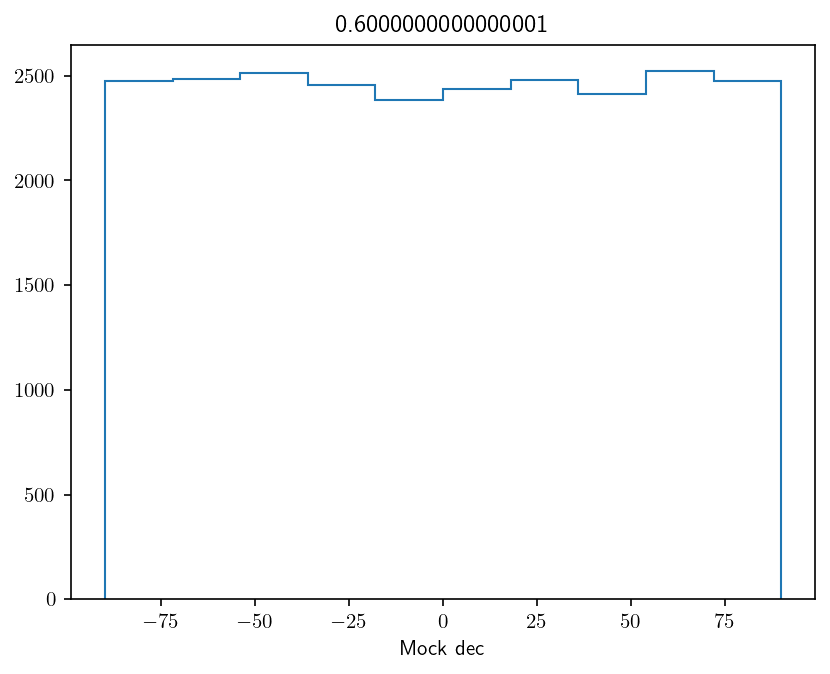

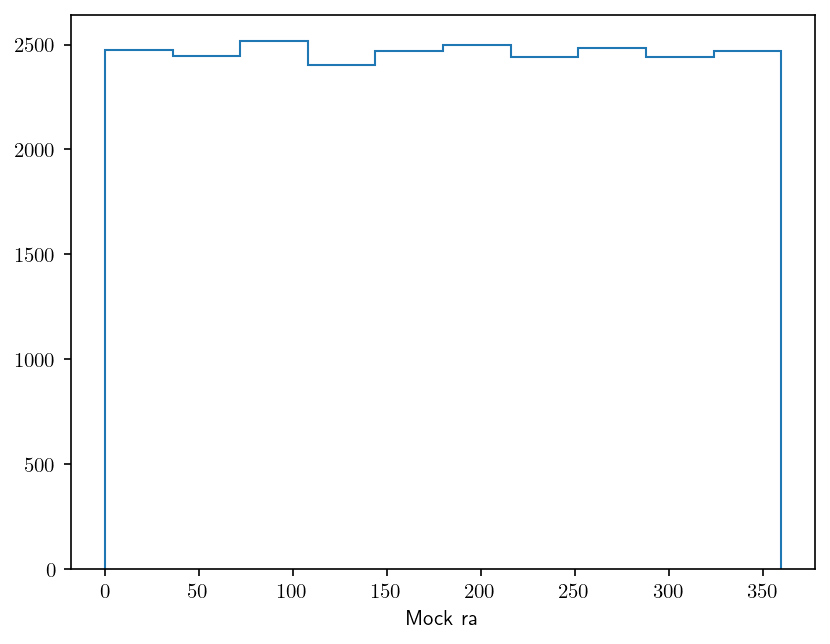

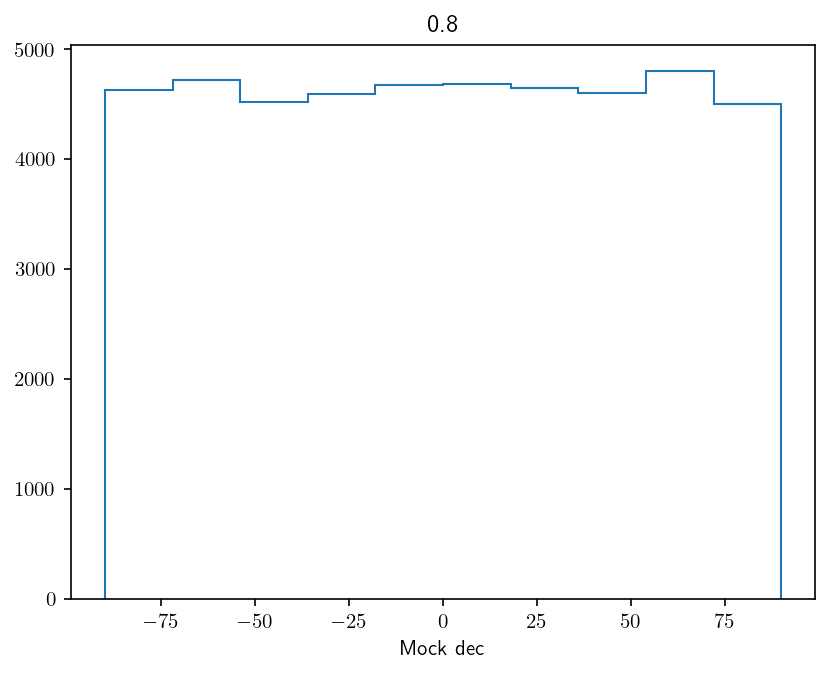

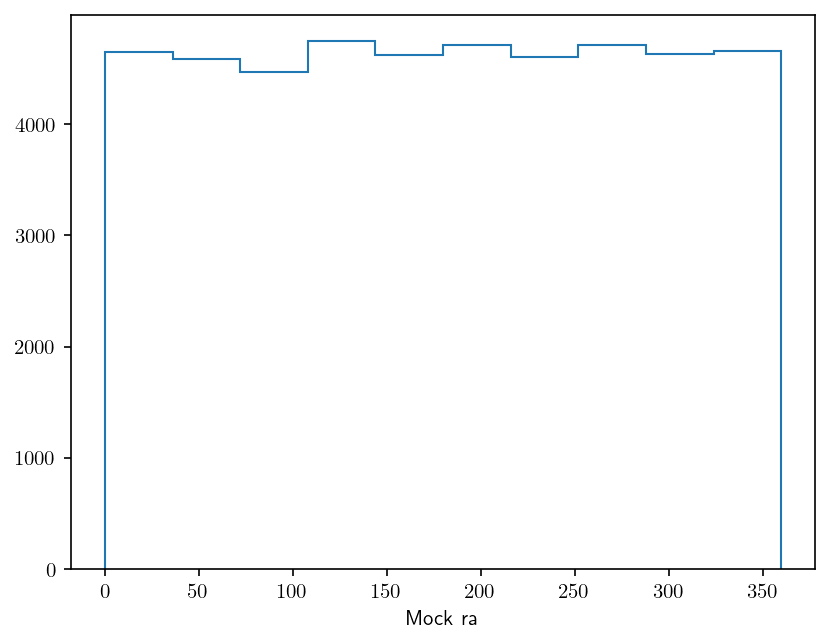

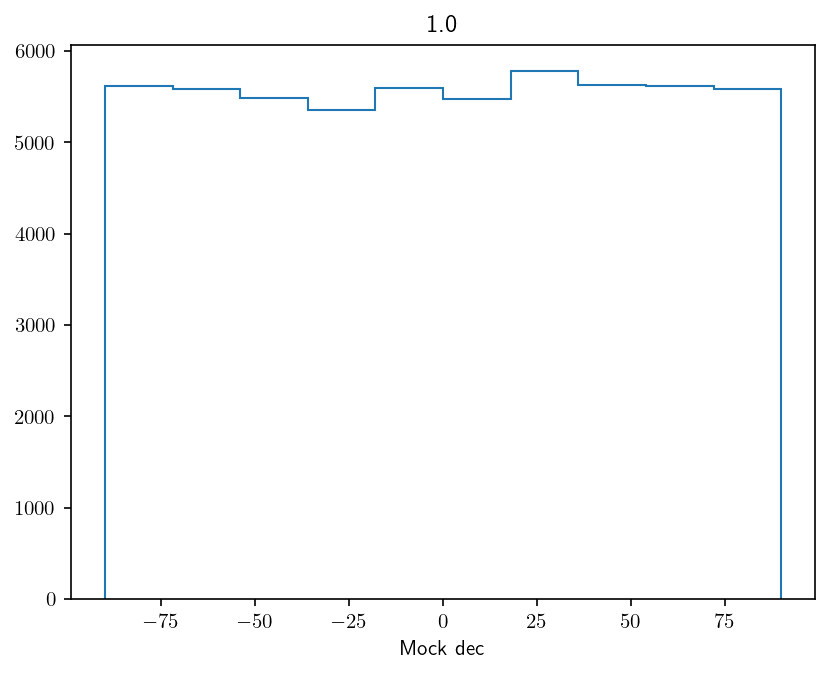

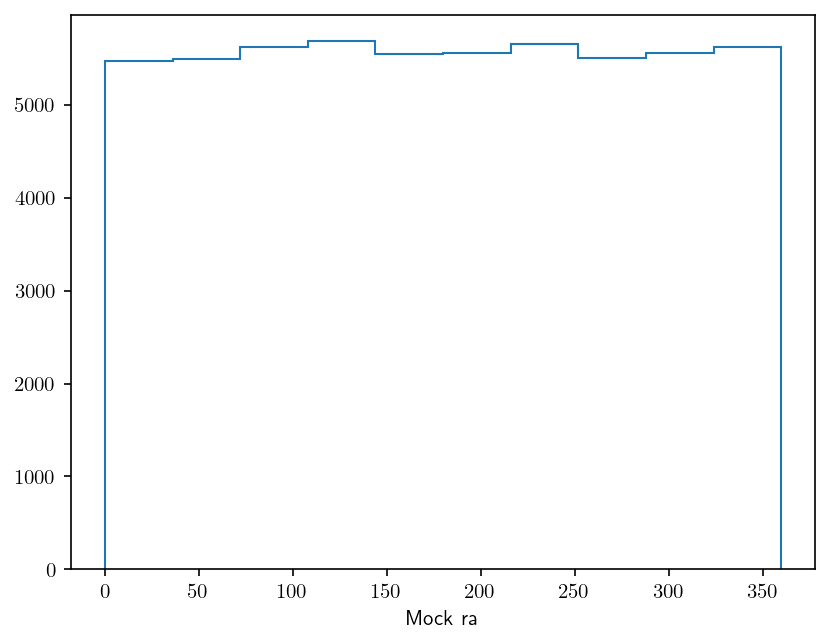

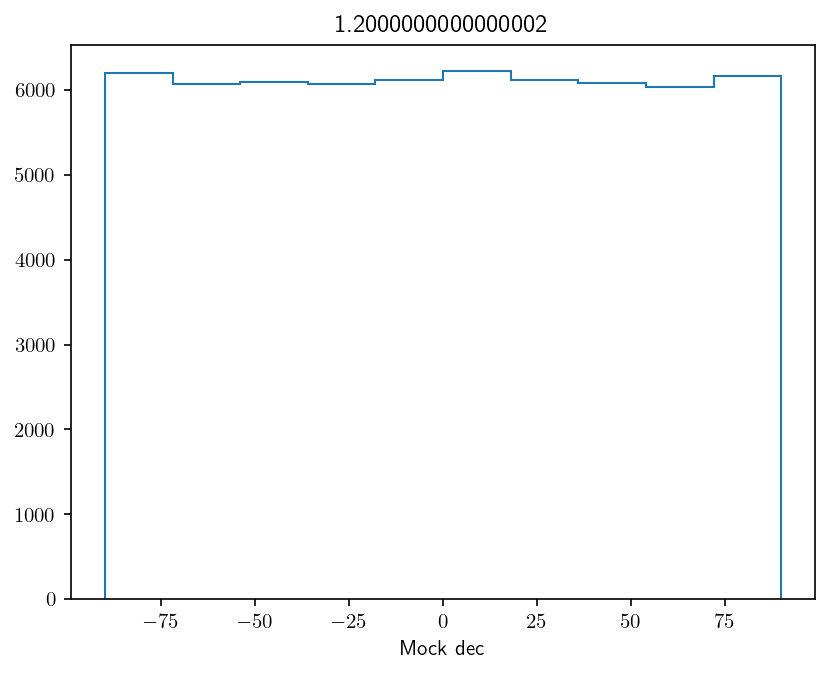

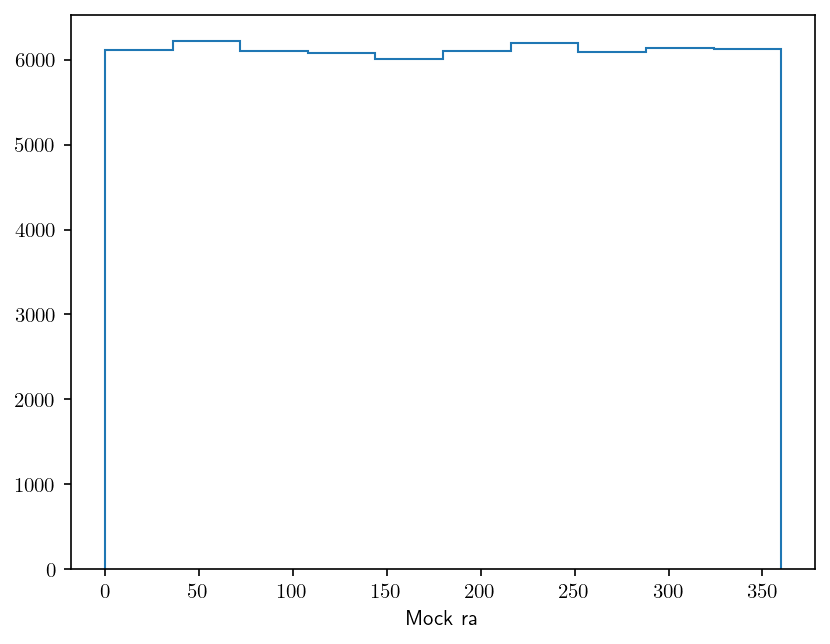

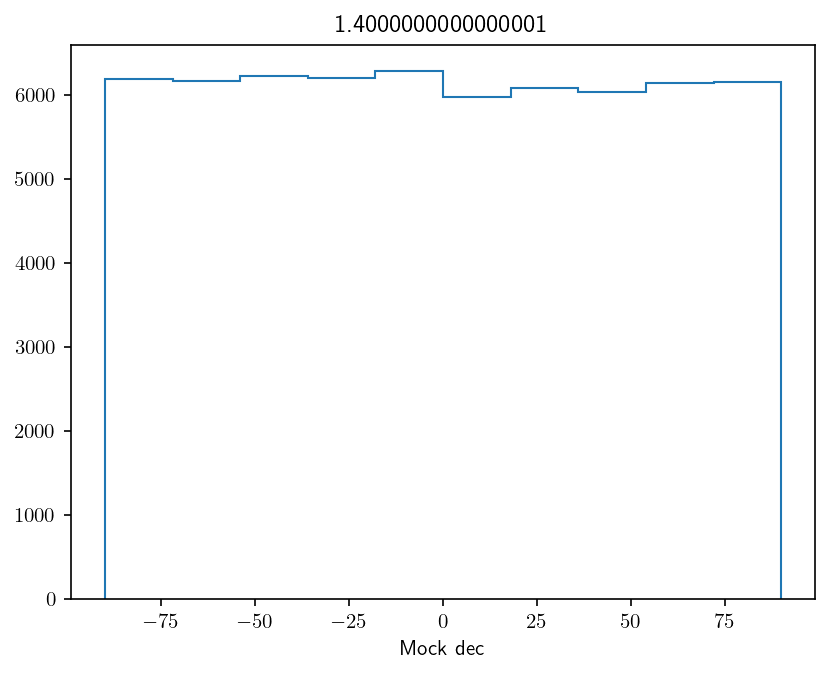

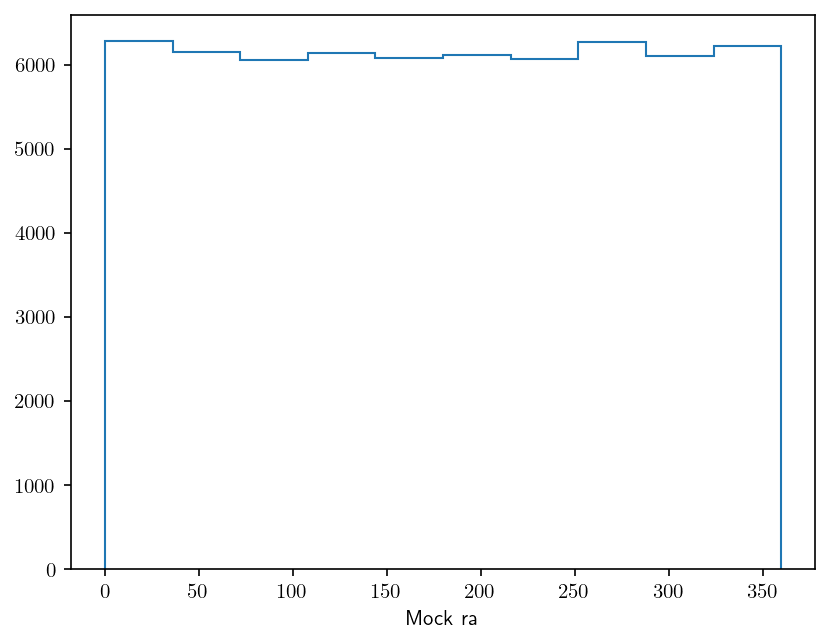

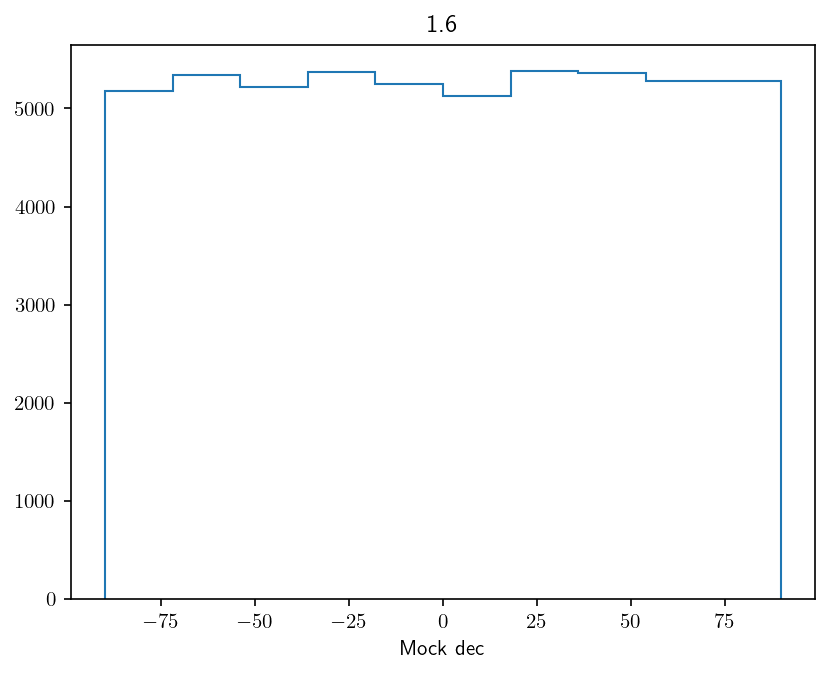

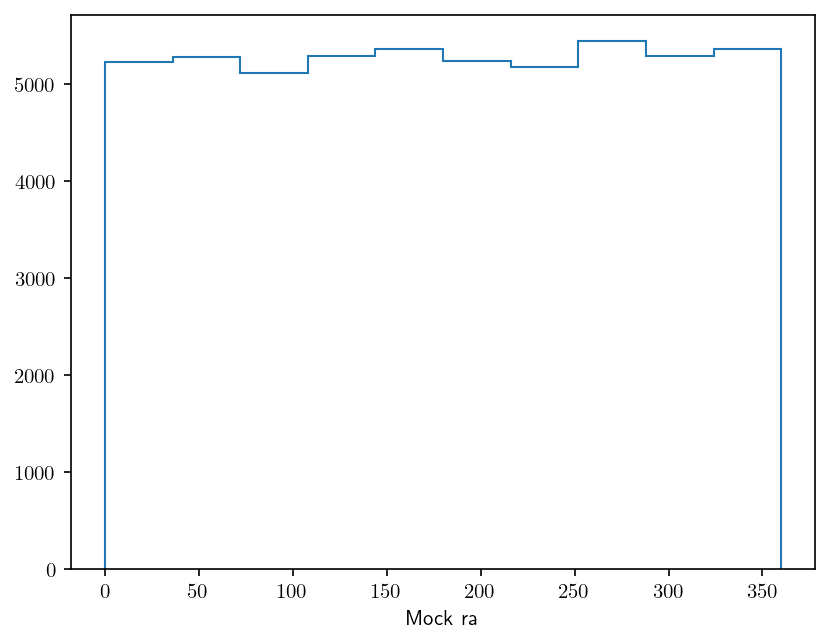

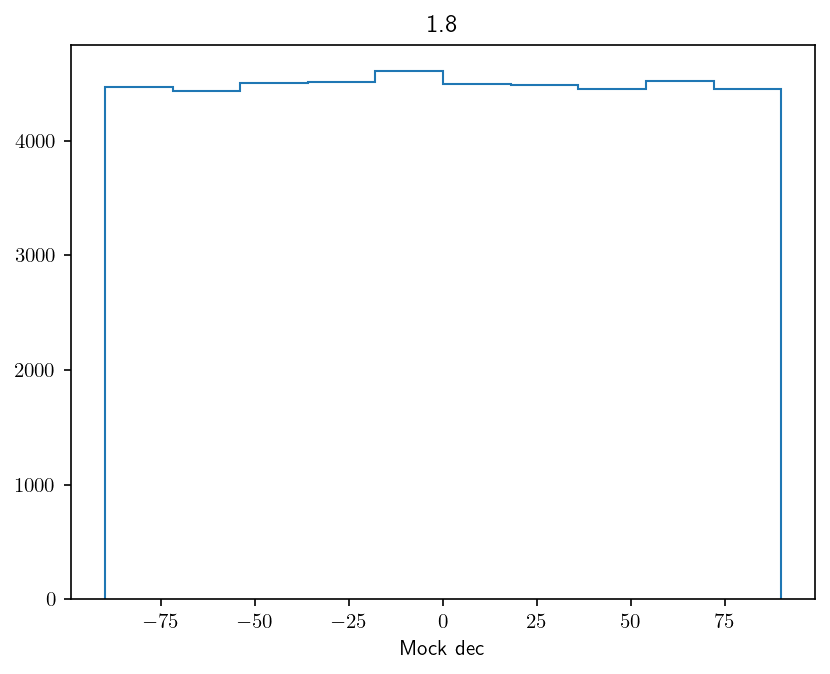

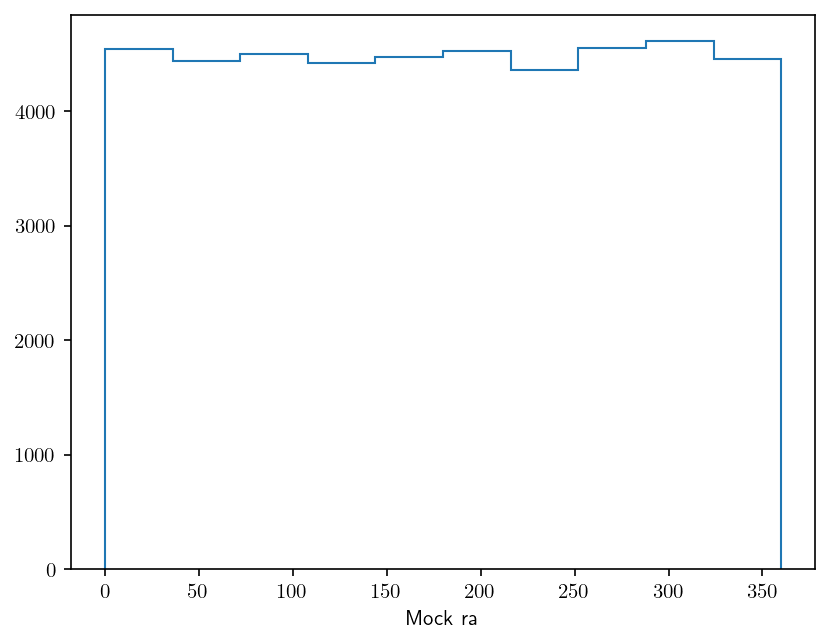

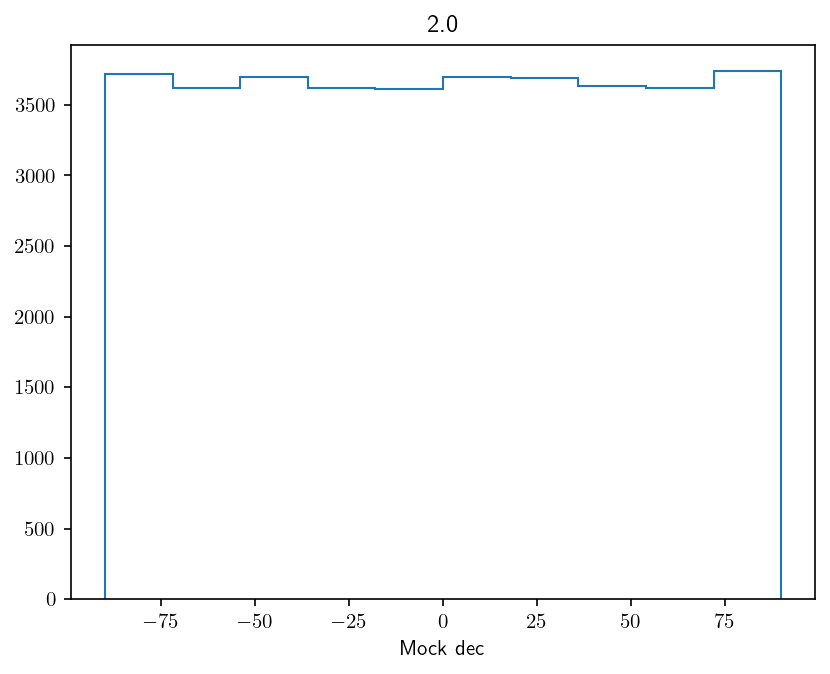

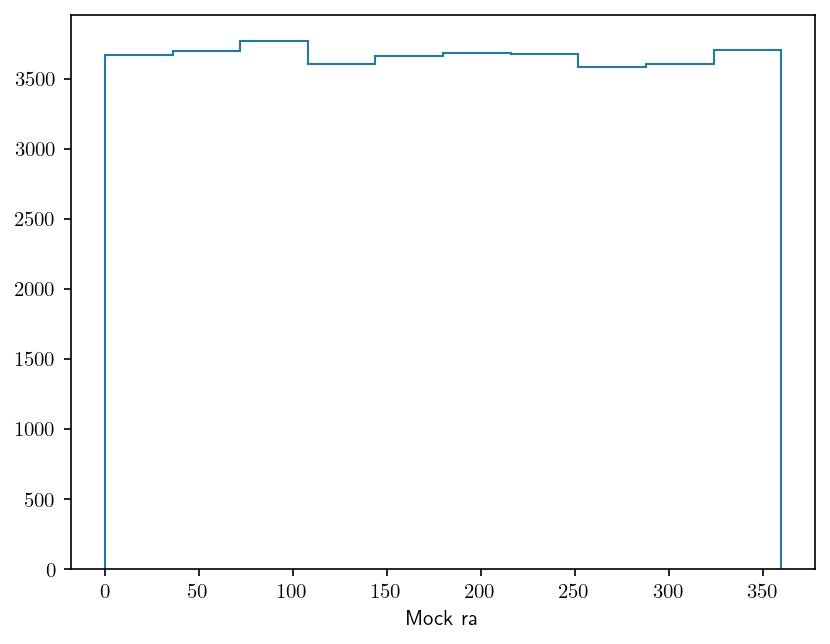

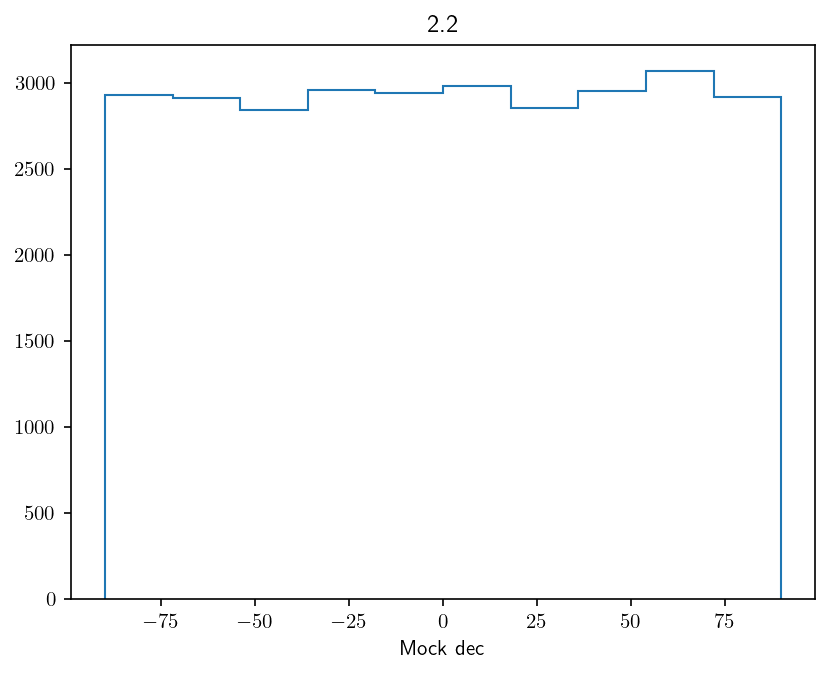

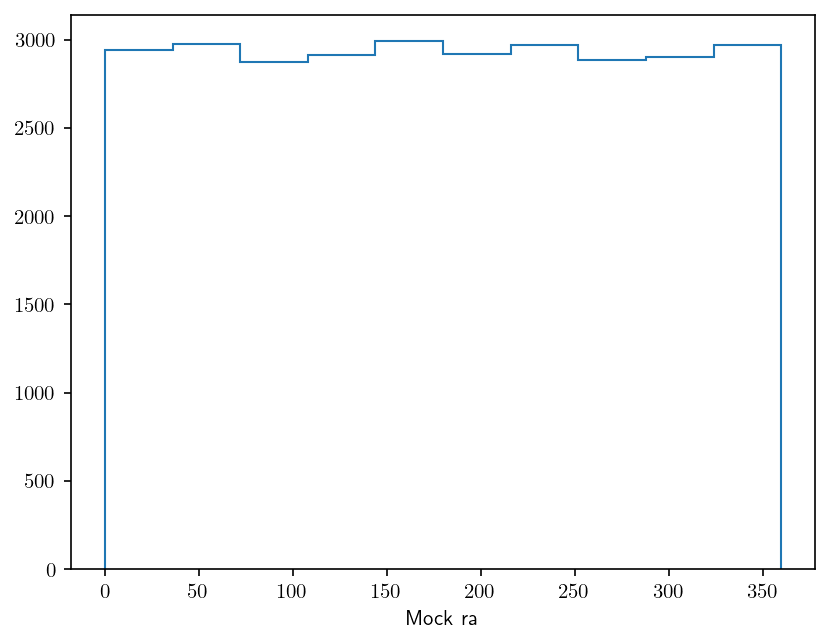

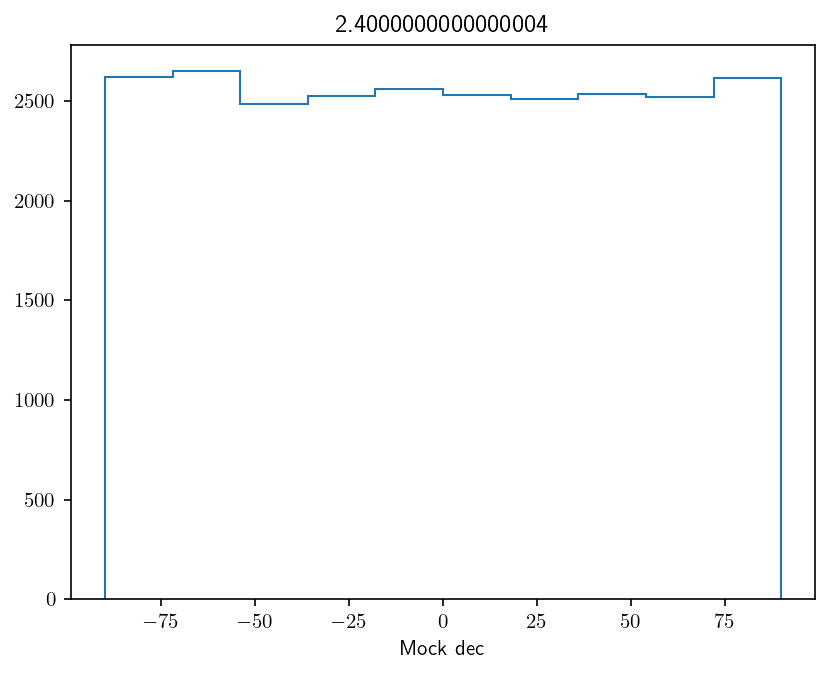

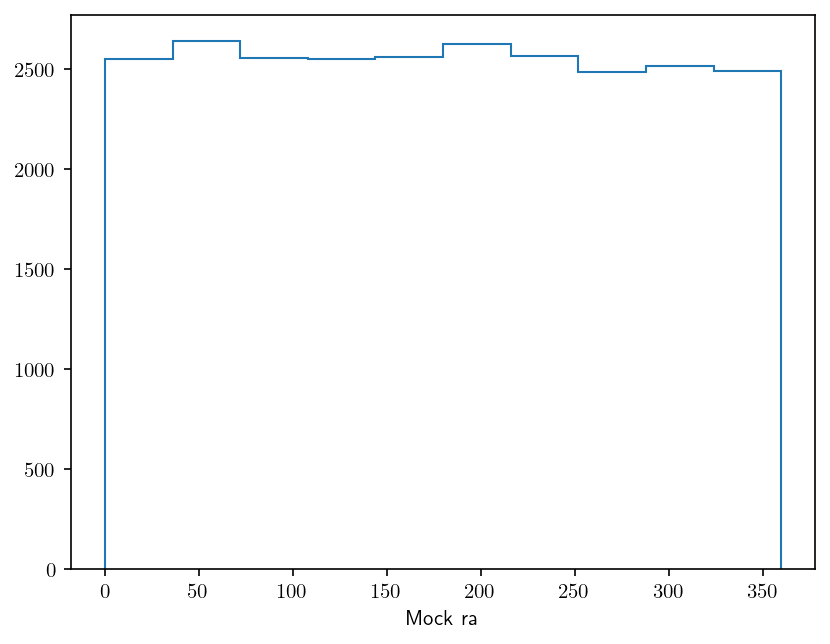

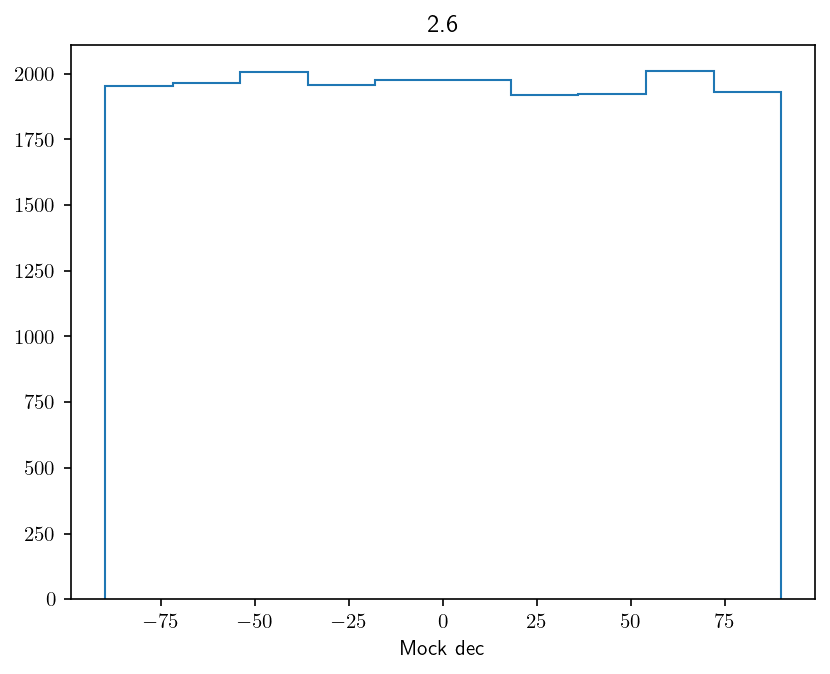

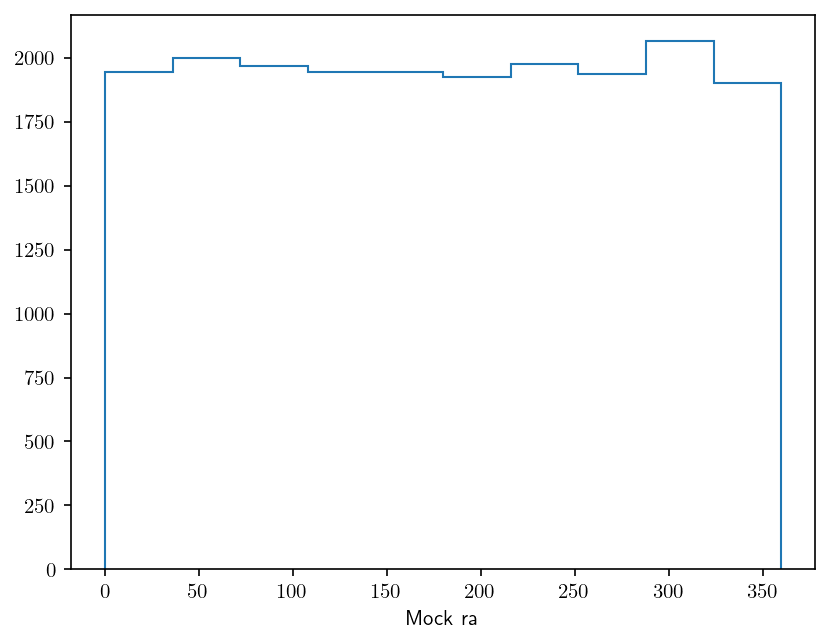

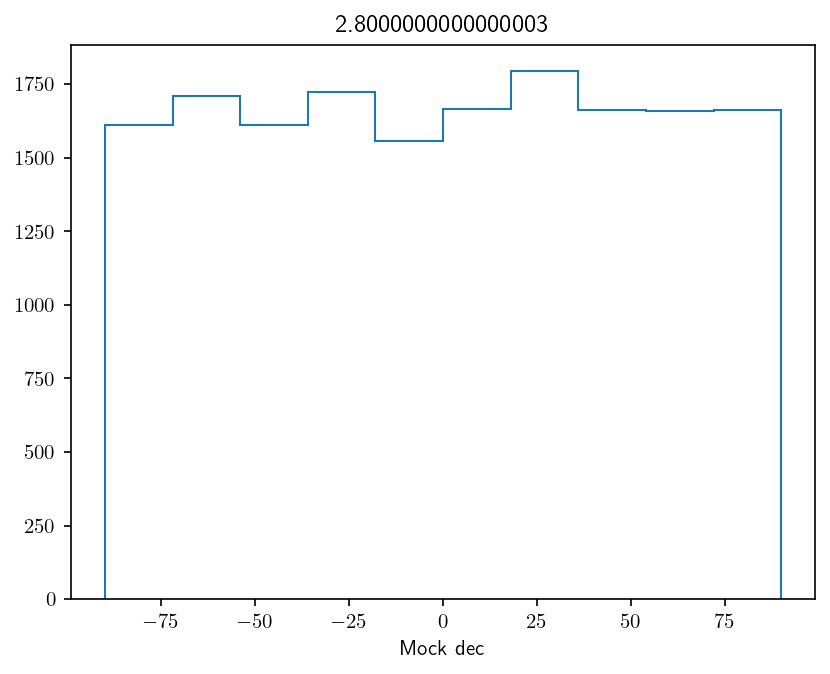

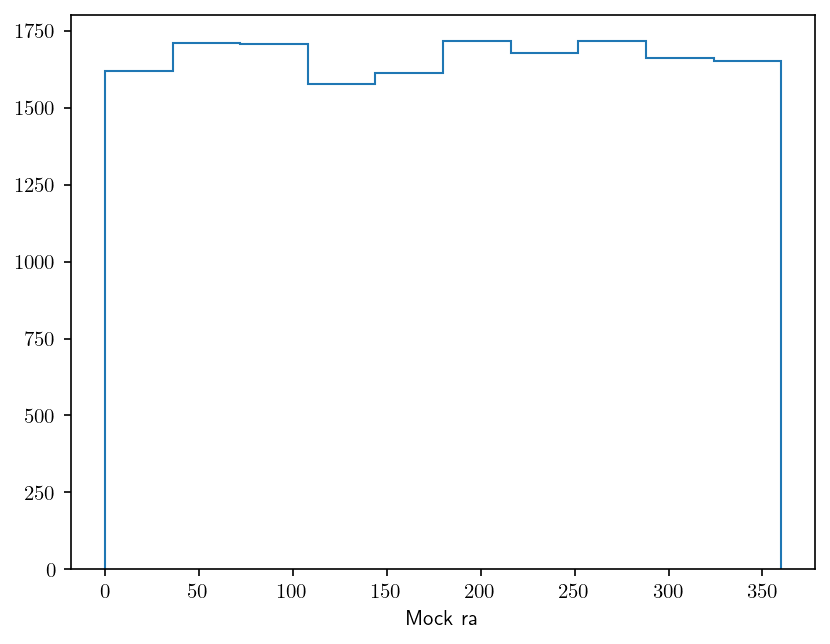

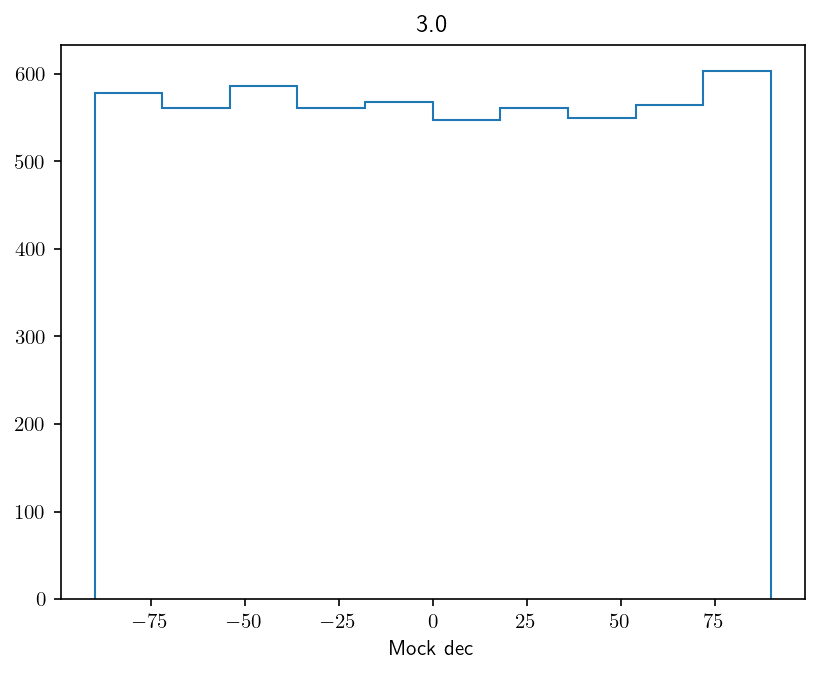

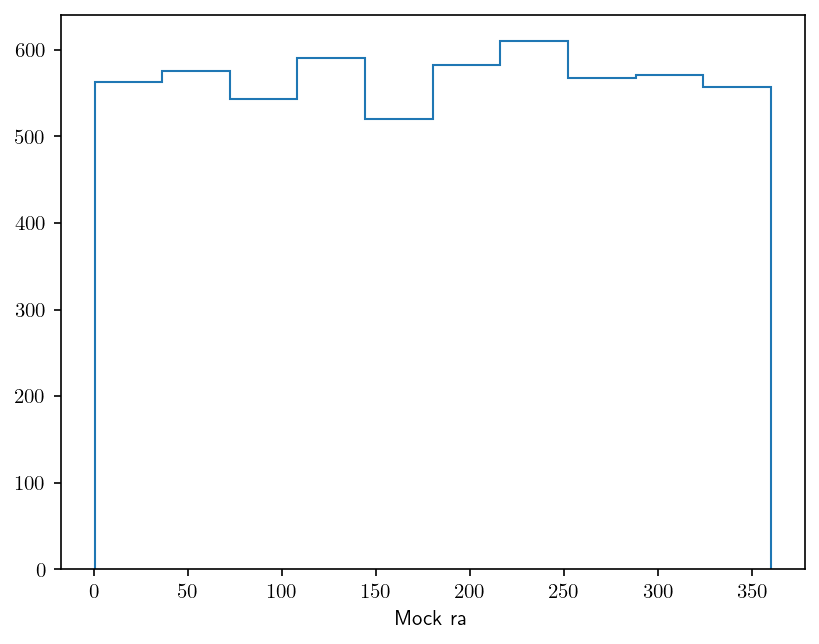

In [355]:
for zMin,zMax in zip(np.arange(0,3.1,step=0.2),np.arange(0,3.1,step=0.2)+0.1):
    mask = np.logical_and(cat_cbc["redshiftHubble"]>zMin, cat_cbc["redshiftHubble"]<zMax)
    plt.hist(cat_cbc[mask]["mdec"],histtype="step")
    plt.xlabel("Mock dec")
    plt.title(zMin)
    plt.show()
    plt.close()
    plt.hist(cat_cbc[mask]["mra"],histtype="step")
    plt.xlabel("Mock ra")
    plt.show()
    plt.close()

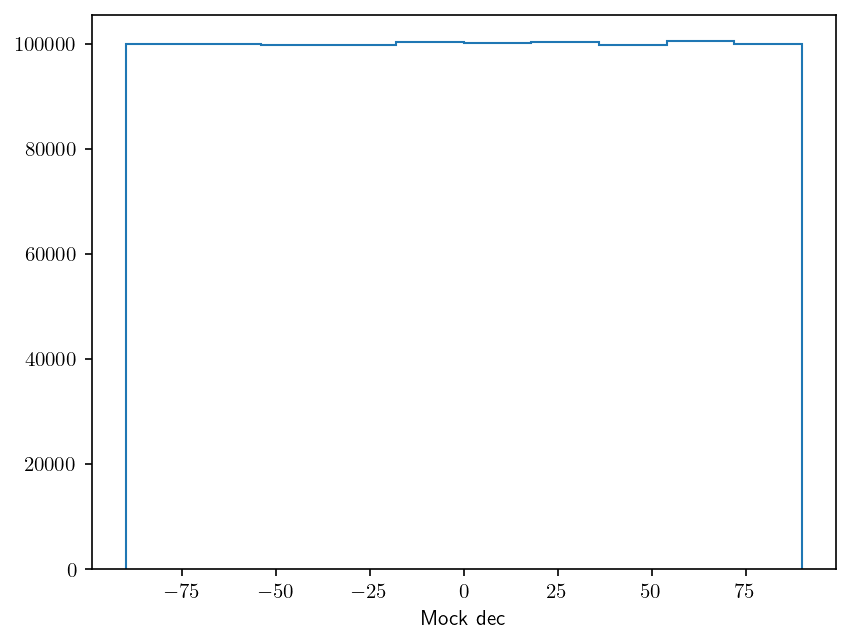

In [347]:
plt.hist(cat_cbc["mdec"],histtype="step")
plt.xlabel("Mock dec")
plt.show()

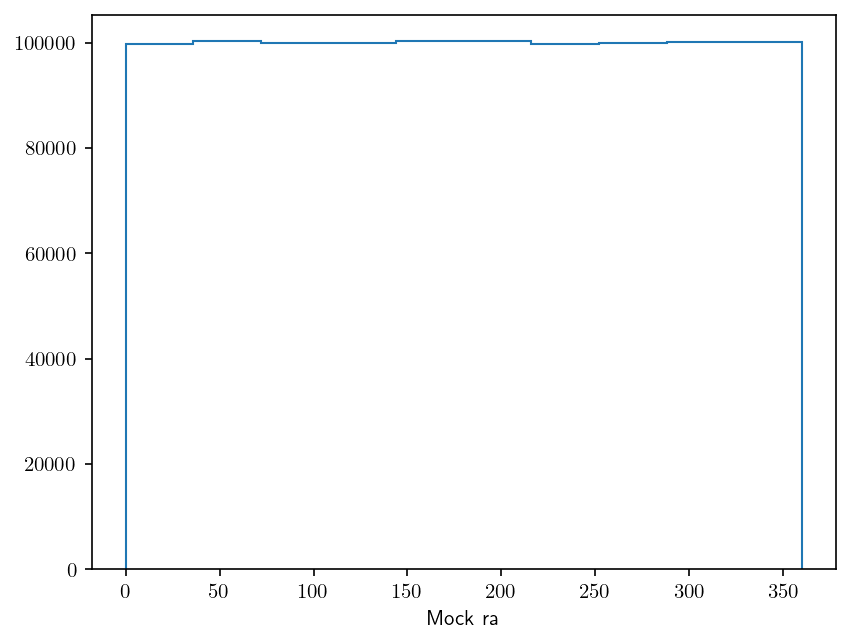

In [346]:
plt.hist(cat_cbc["mra"],histtype="step")
plt.xlabel("Mock ra")
plt.show()

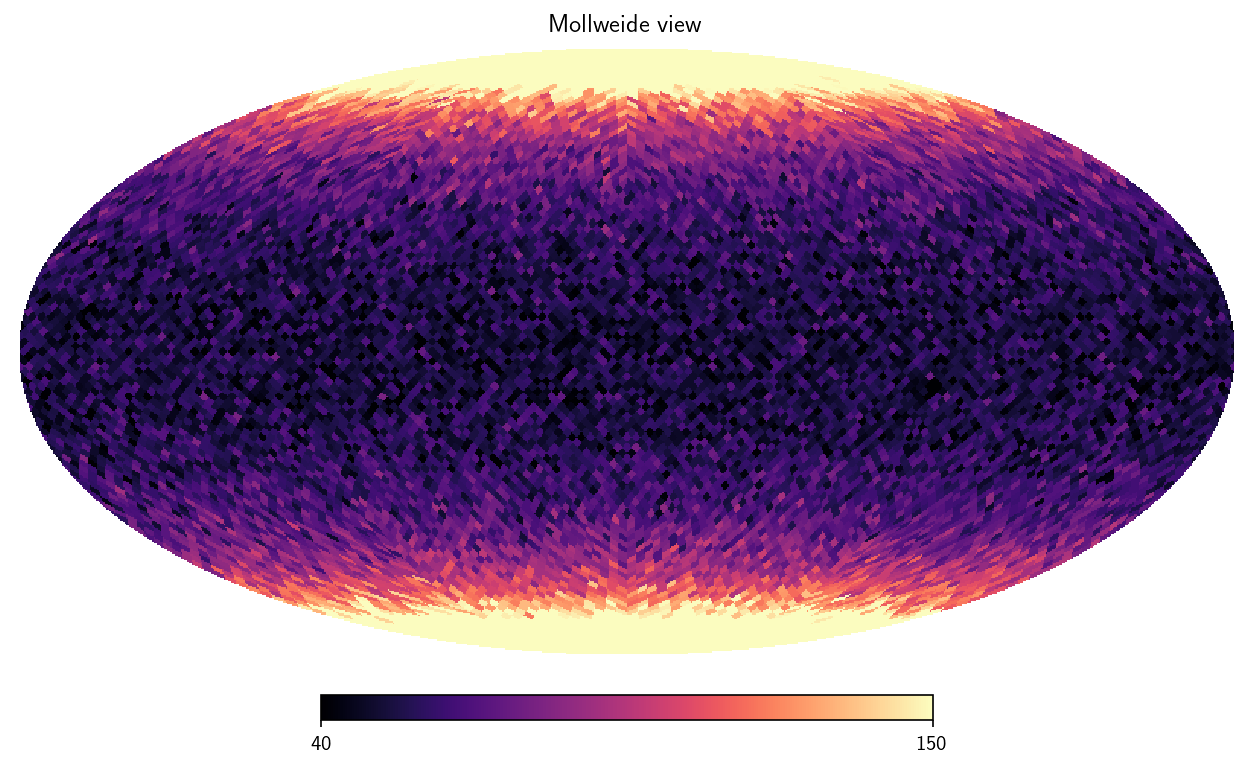

<Figure size 1200x600 with 0 Axes>

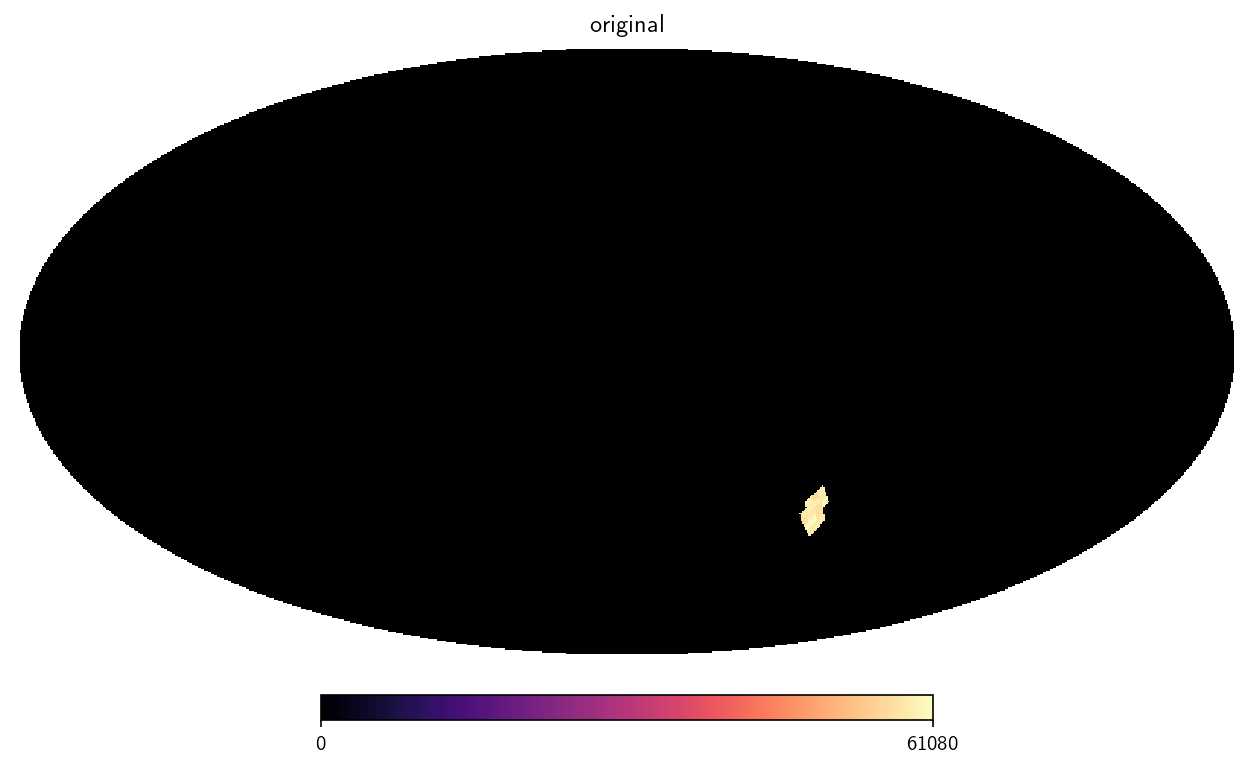

In [335]:
m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))
m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

In [231]:
np.nanpercentile(t16,(2,98))

array([0., 0.])

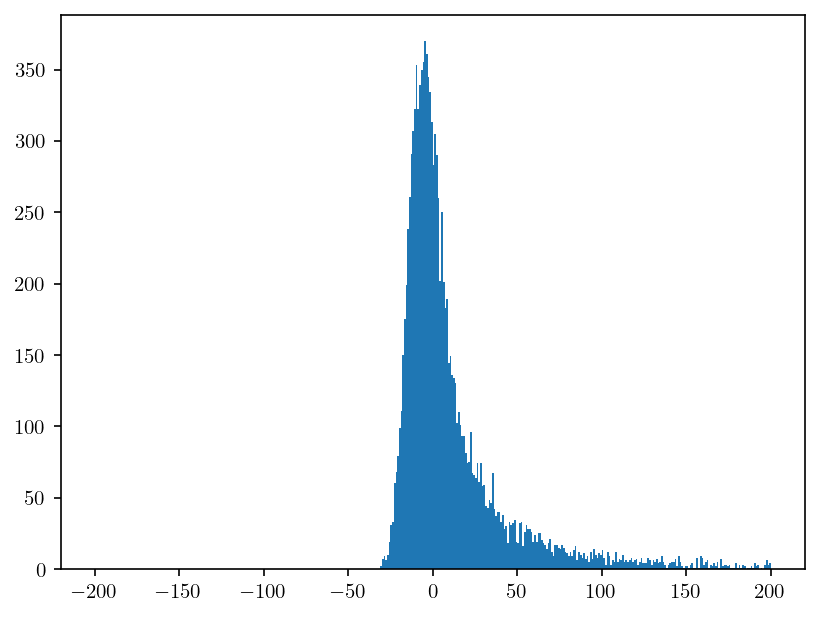

In [228]:
plt.hist(m16-np.median(m16),bins = np.arange(-200,201))
plt.show()

In [ ]:
x = 30.04
y = 95.08
f"prefix_{x:.2f}p{x:.2f}-{y:.2f}p{y:.2f}.csv"

In [385]:
x = 30.04
y = 95.08
filename = f"prefix_{x:.2f}-{y:.2f}.csv".replace(".", "p")
print(filename)

prefix_30p04-95p08pcsv


Text(815.506392823786, 0.5, '$log_{10} \\;(counts)$')

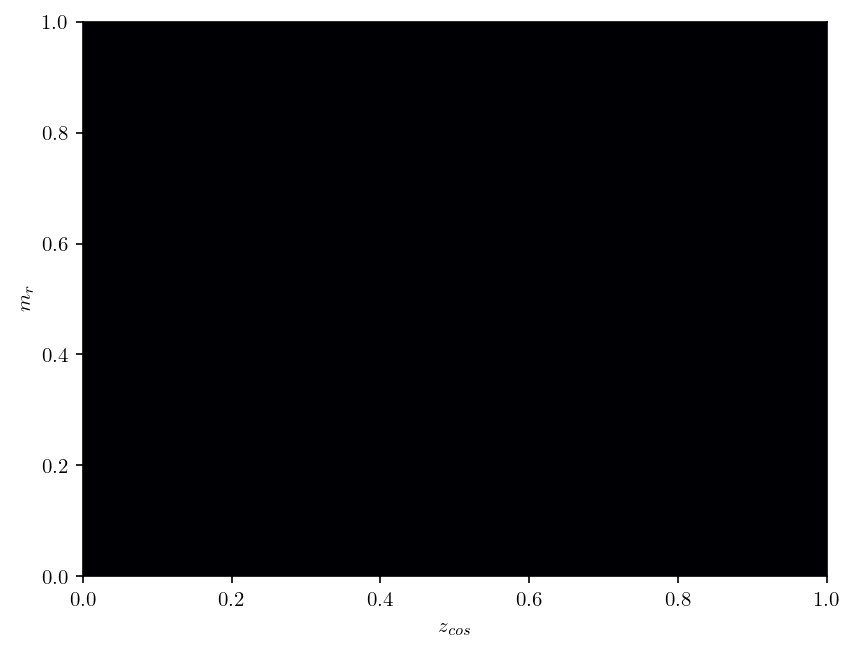

In [212]:
from matplotlib import colors as cl
msk =(catz.tmag_decam_r>=19) & (catz.tmag_decam_r<=30)
plt.hist2d(catz.z_cos[msk],
           catz.tmag_decam_r[msk],  cmap=plt.get_cmap('magma', 60),bins=60, cmin=0, norm=cl.LogNorm());
plt.ylabel("$m_r$")
plt.xlabel("$z_{cos}$")
plt.gca().set_facecolor("k")
_cb = plt.colorbar()
_cb.ax.set_ylabel(r"$log_{10} \;(counts)$")

Text(0, 0.5, '$log_{10} \\;(counts)$')

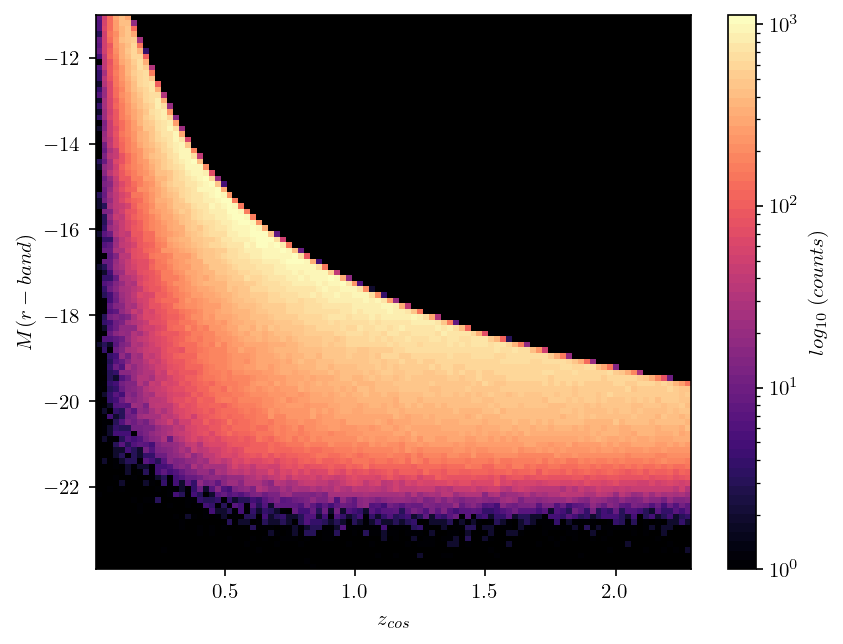

In [645]:
from matplotlib import colors as cl
msk =(catz.tmag_decam_r>=-99)# & (catz.tmag_decam_r<=30)
plt.hist2d(catz.z_cos[msk],
           catz.absmag_r[msk],  cmap=plt.get_cmap('magma', 60),bins=100, cmin=0, norm=cl.LogNorm());
plt.ylabel("$M (r-band)$")
plt.xlabel("$z_{cos}$")
plt.gca().set_facecolor("k")
_cb = plt.colorbar()
_cb.ax.set_ylabel(r"$log_{10} \;(counts)$")